## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data Scientist at AllLife Bank have to build a model that will help the marketing department to identify the potential customers who have a higher probabilipurchasing the loan.Bank)?


### Objective:

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and to identify which segment of customers to target more.

### Data Dictionary:

1.	ID: Customer ID
2.	Age: Customer’s age in completed years
3.	Experience: # years of professional experience
4.	Income: Annual income of the customer (in thousand dollars)
5.	ZIP Code: Home Address ZIP code
6.	Family: The family size of the customer
7.	CCAvg: Average spending on credit cards per month (in thousand dollars)
8.	Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
9.	Mortgage: Value of house mortgage if any (in thousand dollars)
10.	Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
11.	Securities_Account: Does the customer have a securities account with the bank?
12.	CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
13.	Online: Do customers use Internet banking facilities?
14.	CreditCard: Does the customer use a credit card issued by any other Bank (excluding All Life Bank)?

## Importing the necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split,GridSearchCV

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    make_scorer,
    confusion_matrix,
)

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [2]:
Loan_data = pd.read_csv("Loan_Modelling.csv")

## Overview of the dataset

### View the first and last 5 rows of the dataset.

In [3]:
# copying data to another variable to avoid any changes to original data
data = Loan_data.copy()

In [4]:
data.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [5]:
data.tail()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

### Understand the shape of the dataset.

In [6]:
data.shape

(5000, 14)

#### Observation 
The dataset has 5000 rows and 14 columns.

### Check the data types of the columns for the dataset.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


#### Observation 
1. CCAvg is of float type
2. Rest all coumns are of integer type

### Checking for missing values

In [8]:
# checking for null values
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

#### Observation 
* There are no null values in the dataset

In [9]:
# checking for duplicate values
data.duplicated().sum()

0

#### Observation 
* There are no duplicate values in the data.

In [10]:
#Checking total no.of unique values in ID column
data.ID.nunique()

5000

#### Observation 
* ID column is similar to index
* Therefor dropping ID column from dataset

#### Dropping the columns with all unique values

In [11]:
data = data.drop(["ID"], axis=1)

In [12]:
#Checking total columns after dropping ID column
print(data.columns)

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')


#### Observation 
* We notice that ID column is deleted from dataset.

In [13]:
#Checking total no.of unique values in ZIPCode column
data.ZIPCode.nunique()

467

#### Observation 
* Out of 5000 records , there are 467 unique Zipcodes are present.
* Opportunity to handle them at later point is observed.

### Statistical summary of the data


In [14]:
data.describe().T

count          mean          std      min      25%  \
Age                 5000.0     45.338400    11.463166     23.0     35.0   
Experience          5000.0     20.104600    11.467954     -3.0     10.0   
Income              5000.0     73.774200    46.033729      8.0     39.0   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.0   
Family              5000.0      2.396400     1.147663      1.0      1.0   
CCAvg               5000.0      1.937938     1.747659      0.0      0.7   
Education           5000.0      1.881000     0.839869      1.0      1.0   
Mortgage            5000.0     56.498800   101.713802      0.0      0.0   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.0   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.0   
CD_Account          5000.0      0.060400     0.238250      0.0      0.0   
Online              5000.0      0.596800     0.490589      0.0      0.0   
CreditCard          5000.0      0.294000     0.455637      0.0      0.0   

                        50%      75%      max  
Age                    45.0     55.0     67.0  
Experience             20.0     30.0     43.0  
Income                 64.0     98.0    224.0  
ZIPCode             93437.0  94608.0  96651.0  
Family                  2.0      3.0      4.0  
CCAvg                   1.5      2.5     10.0  
Education               2.0      3.0      3.0  
Mortgage                0.0    101.0    635.0  
Personal_Loan           0.0      0.0      1.0  
Securities_Account      0.0      0.0      1.0  
CD_Account              0.0      0.0      1.0  
Online                  1.0      1.0      1.0  
CreditCard              0.0      1.0      1.0

#### Observation
1. Average age of the customers = 45, Min age = 23, Max age = 67. Also 50% of the customers in the dataset are aged 45 years .
2. Avg experience of the customer = 20 years, Min = -3 (Experience cannout be in negative), Max = 43 years.
3. Avg income of the customers = 74,000 USD , Min income = 8000 USD, Max income = 224,000 USD. Also 50% of the customers in the dataset have income of 64,000 USD and above
4. The average family size for each customer = 2, Min = 1, Max = 4. Also 50% of all customers having a family size of 2 and above.
5. The average spending on credit cards is 2,000 USD per month, Min = 0 USD, Max = 10,000 USD
6. The average value of mortgages held by each customer is around 56,000 USD, Min = 0 USD, Max = 635,000 USD
7. Education Level, Personal Loan , Securities_Account, CD_Account, Online, CreditCard statistics are question type data. Further analysis needed for these columns. 

## <a name='link2'>Exploratory Data Analysis (EDA) Summary</a>

In [15]:
# function to create histogram boxplots

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [16]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [17]:
# function to create stacked barplots

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [18]:
# function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

## Univariate Analysis

### 1. Age

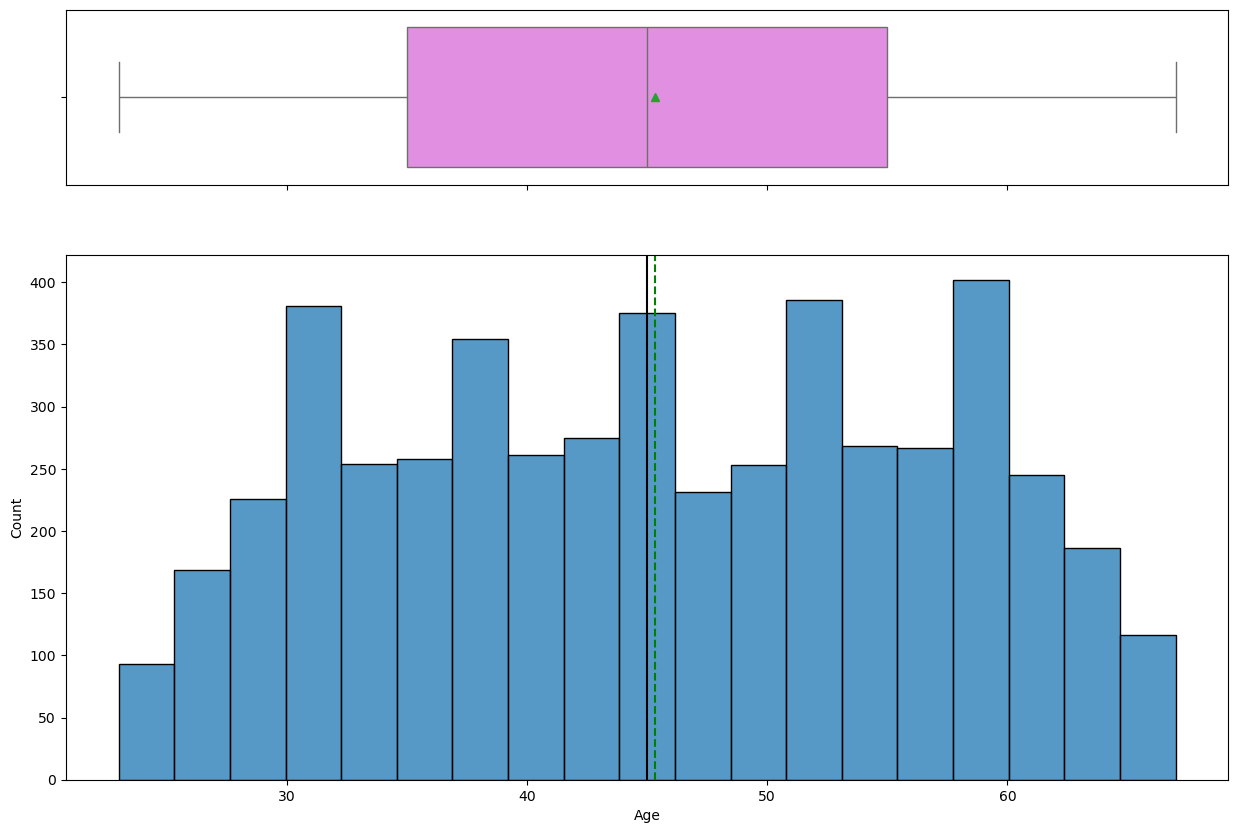

In [19]:
histogram_boxplot(data, "Age")

#### Observation
* We see a normal distribution for Age
* Box plot indicates NO outliers

### 2. Experience

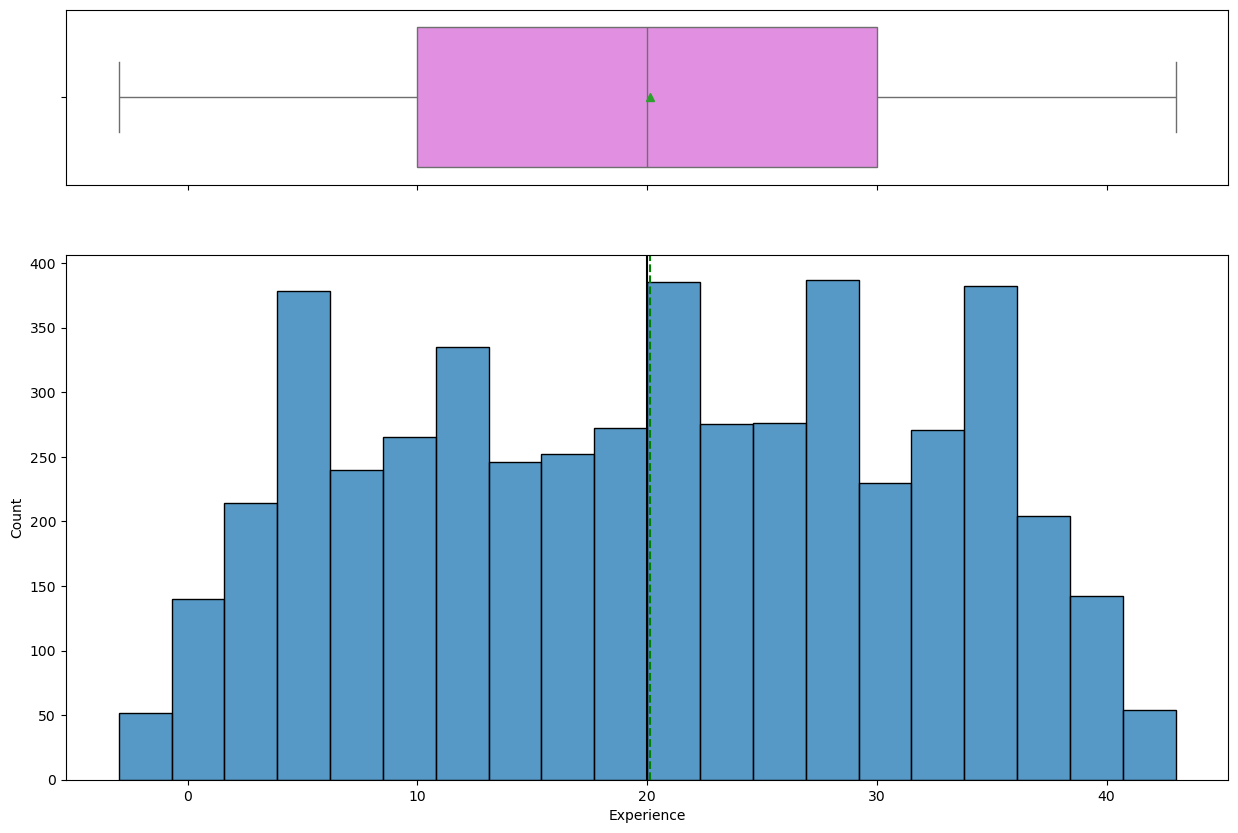

In [20]:
histogram_boxplot(data, "Experience")

#### Observation
* We see a normal distribution for Experience
* Box plot indicates NO outliers

### 3. Income

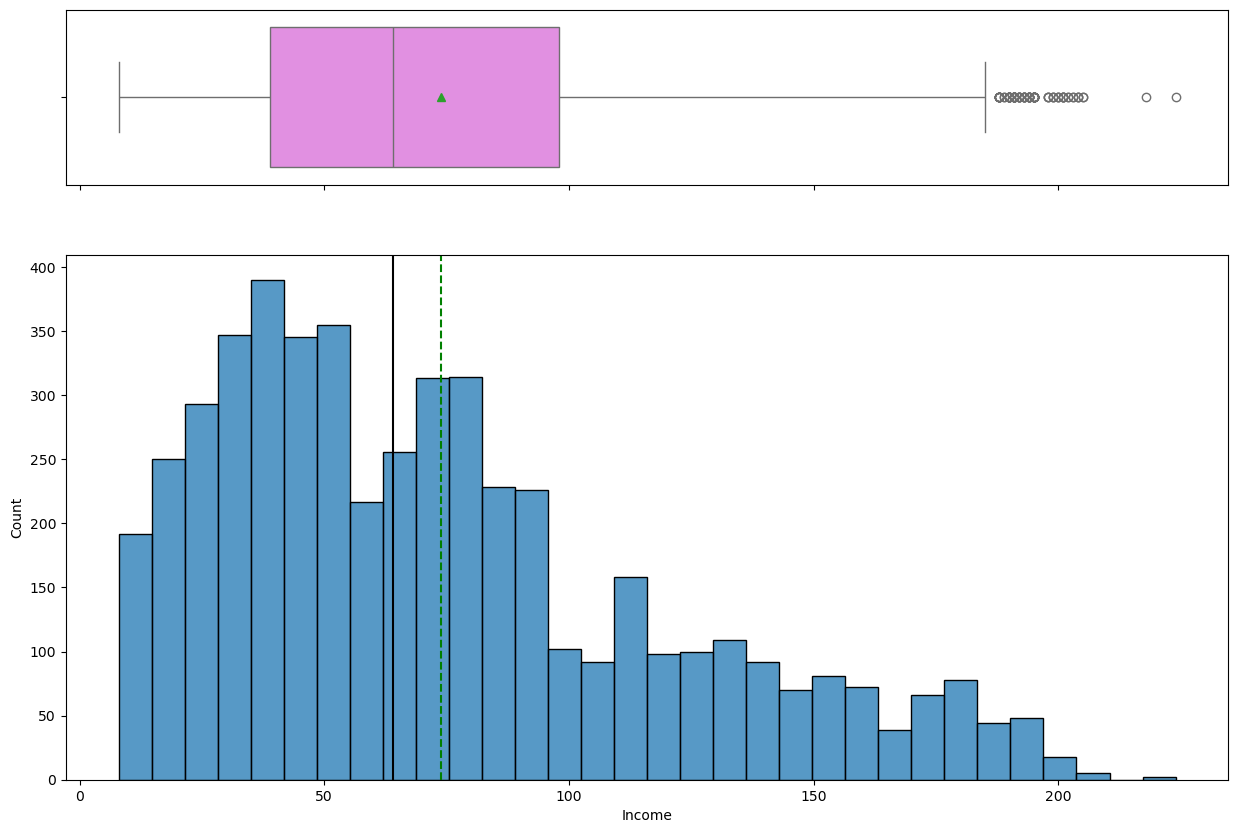

In [21]:
histogram_boxplot(data, "Income")

#### Observation
* Distribution is right skewed
* Box plot indicates outliers are present

### 4. Family

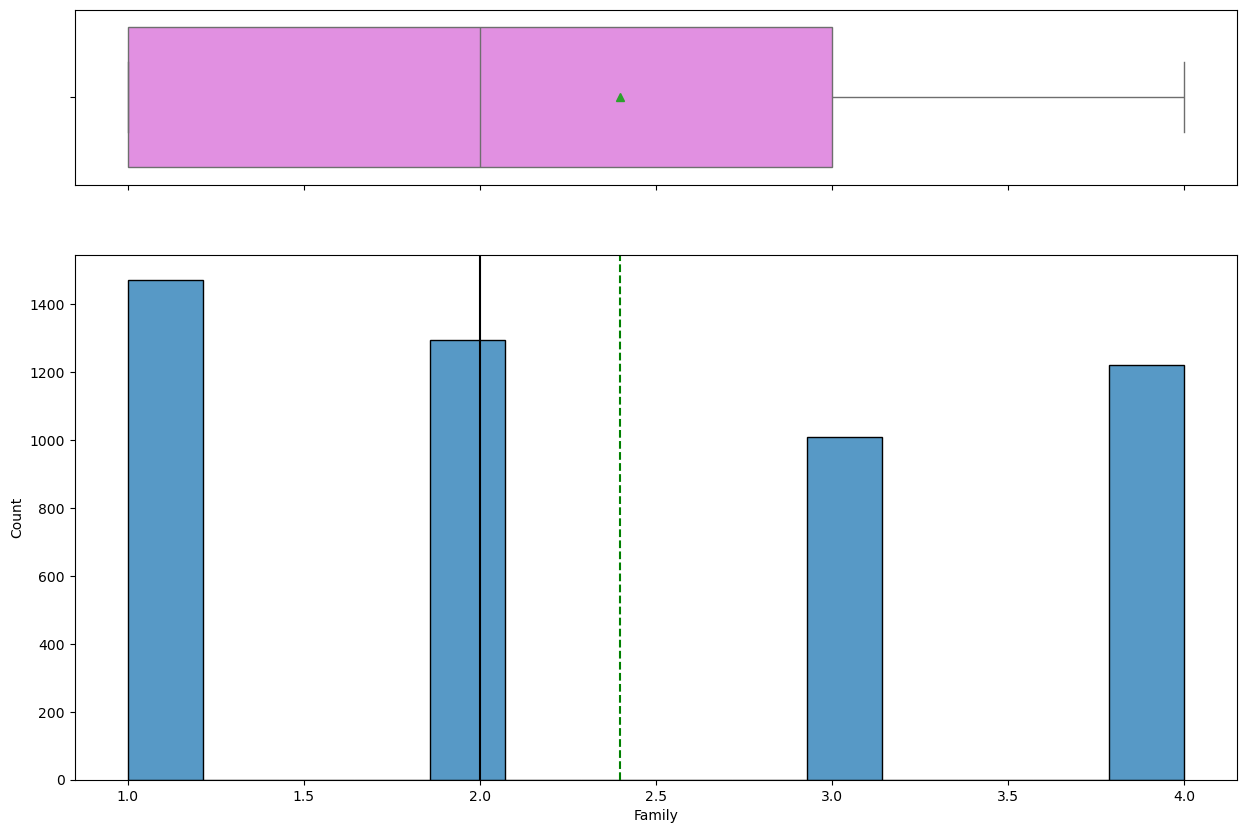

In [22]:
histogram_boxplot(data, "Family")

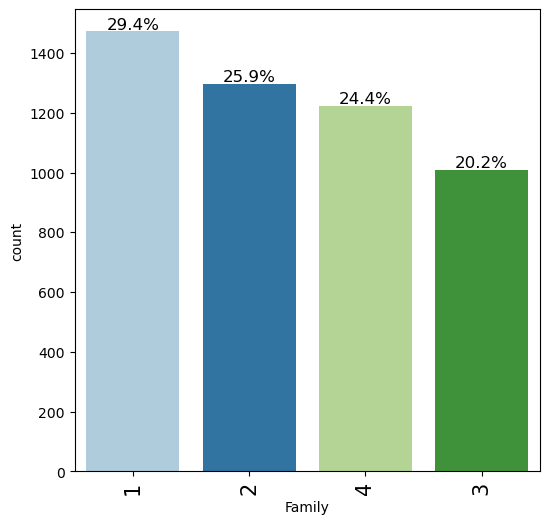

In [23]:
labeled_barplot(data, "Family",perc=True)

#### Observation
* There are more number of customers with Family size = 1
* Least no.of customers are with family size = 3
* Distribution seem to be right skewed based on boxplot

### 5. CCAvg

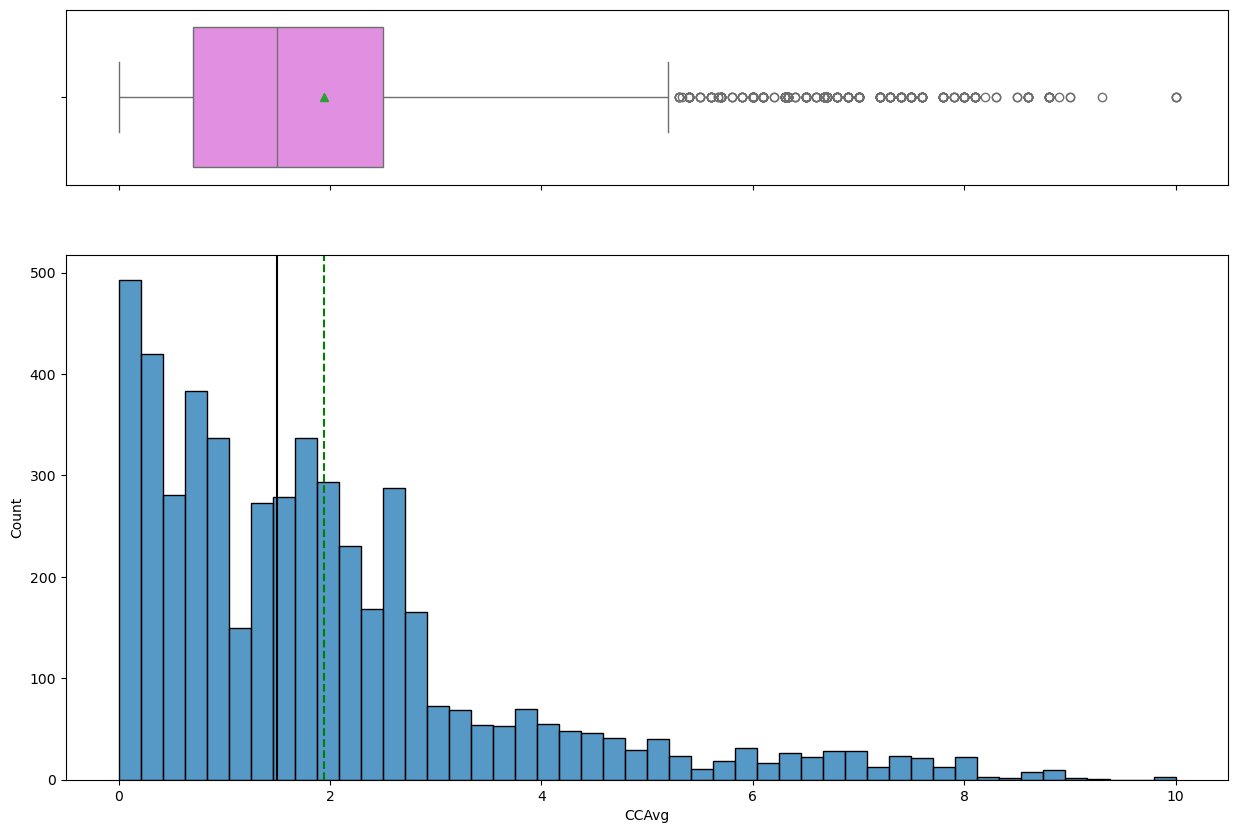

In [24]:
histogram_boxplot(data, "CCAvg")

#### Observation
* Distribution seem to be right skewed
* Outliers observed for this column.

### 6. Education

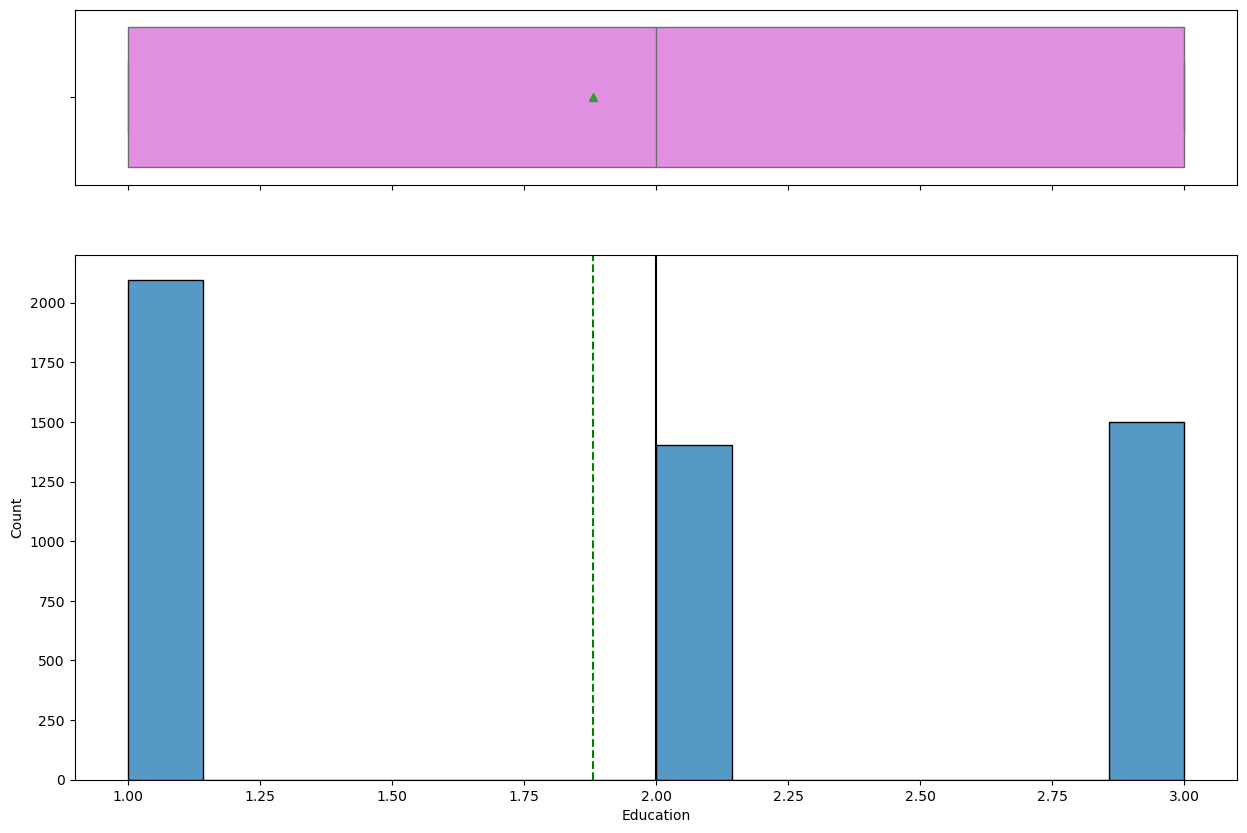

In [25]:
histogram_boxplot(data, "Education")

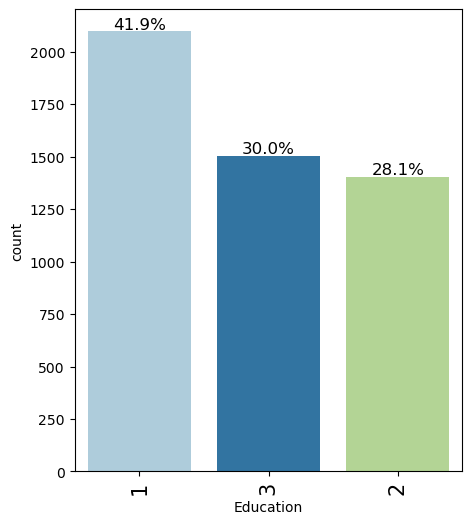

In [26]:
labeled_barplot(data, "Education",perc=True)

#### Observation
* Majority of customers are Undergrad with 41.9% of overall data
* Followed by Advanced/Professional with 30% of data
* Last is Graduate with 28.1% of data

### 7. Mortgage

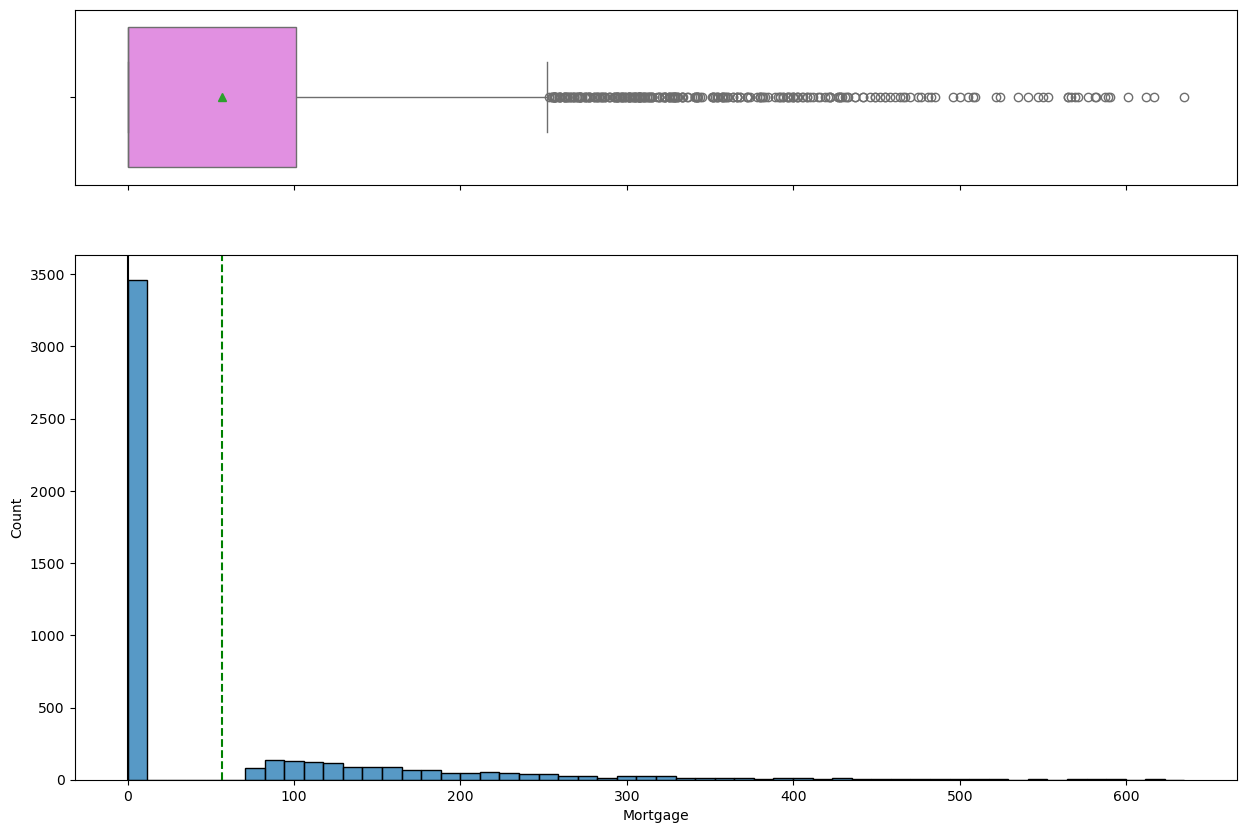

In [27]:
histogram_boxplot(data, "Mortgage")

#### Observation
* Distribution seem to be right skewed
* Outliers observed from box plot.

### 8. Personal_Loan

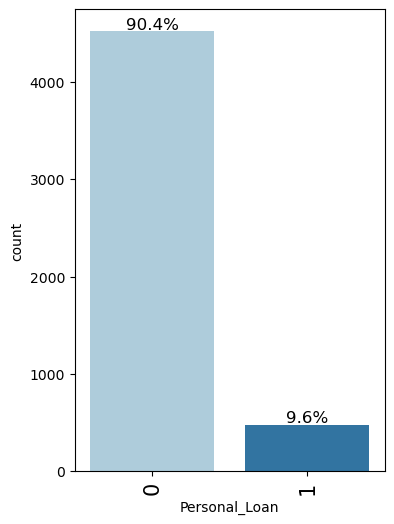

In [28]:
labeled_barplot(data, "Personal_Loan",perc=True)

#### Observation
* 90.4% of customers didnot accept personal loan
* 9.6% customers have accepted personal loan

### 9. Securities_Account

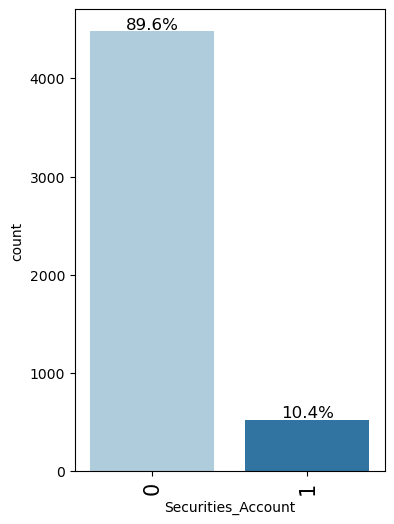

In [29]:
labeled_barplot(data, "Securities_Account",perc=True)

#### Observation
* 89.6% of customers does not have securities account
* 10.4% of customers have securities account

### 10. CD_Account

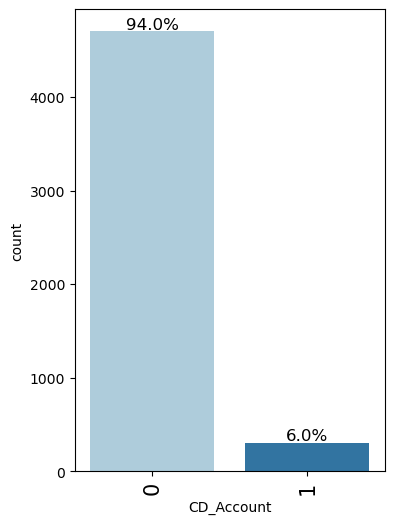

In [30]:
labeled_barplot(data, "CD_Account",perc=True)

#### Observation
* 94% of customers does not have certificate of deposit (CD) account with the bank
* 6% of customers have certificate of deposit (CD) account with the bank

### 11. Online

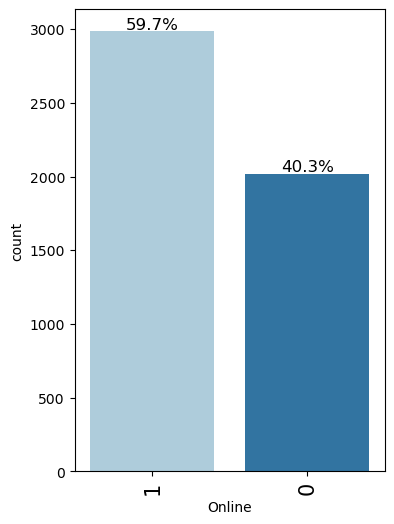

In [31]:
labeled_barplot(data, "Online",perc=True)

#### Observation
* 59.7% of customers use Internet banking facilities
* 40.3% of customers do not use Internet banking facilities

### 12. CreditCard

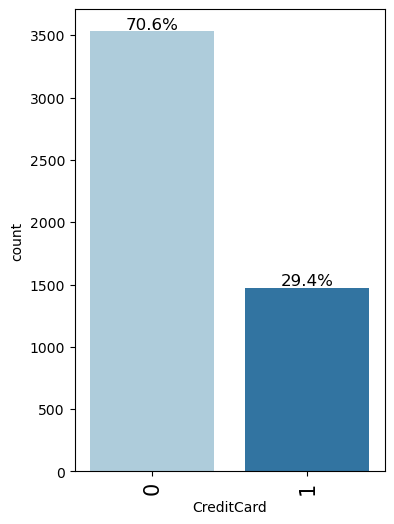

In [32]:
labeled_barplot(data, "CreditCard",perc=True)

#### Observation
* 29.4% of customers use a credit card issued by any other Bank (excluding All Life Bank)
* 70.6% of customers do not use a credit card issued by any other Bank (excluding All Life Bank)

## Bivariate Analysis

#### Let's analyze the relation between Personal Loan and other variables. This would tell us how the data performs for customers who had already been offered personal loan earlier


 Plotting for: Age


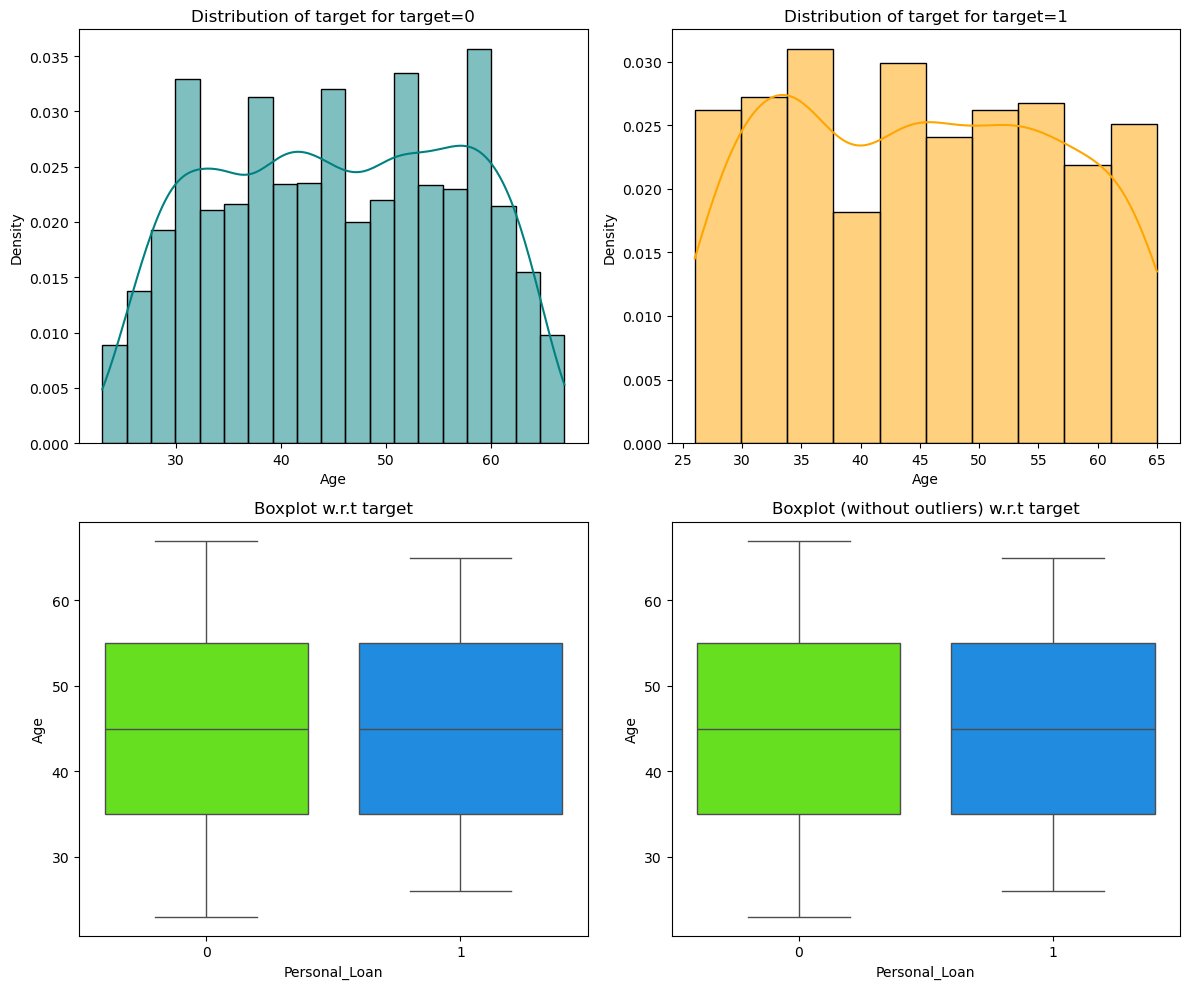


 Plotting for: Experience


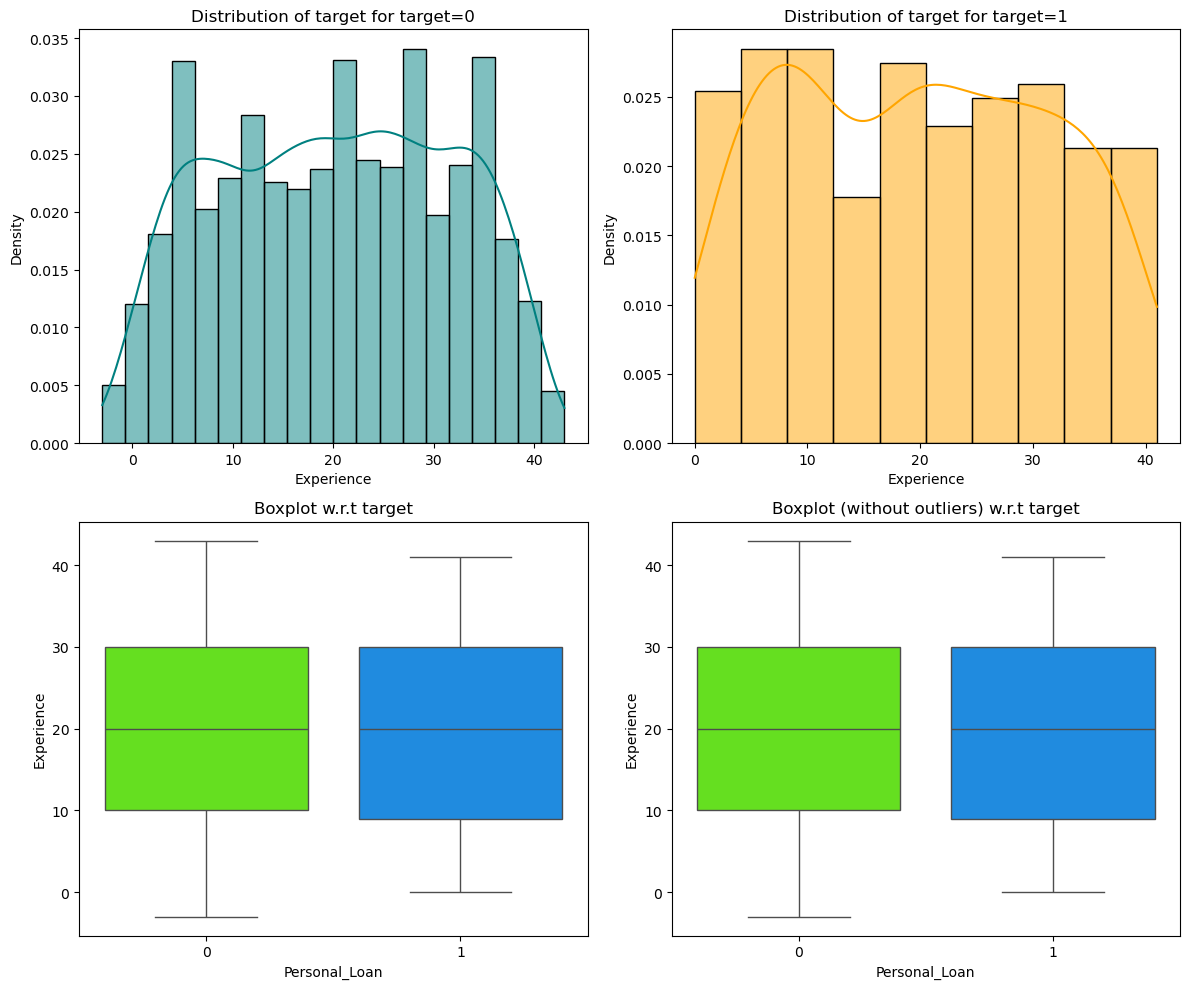


 Plotting for: Income


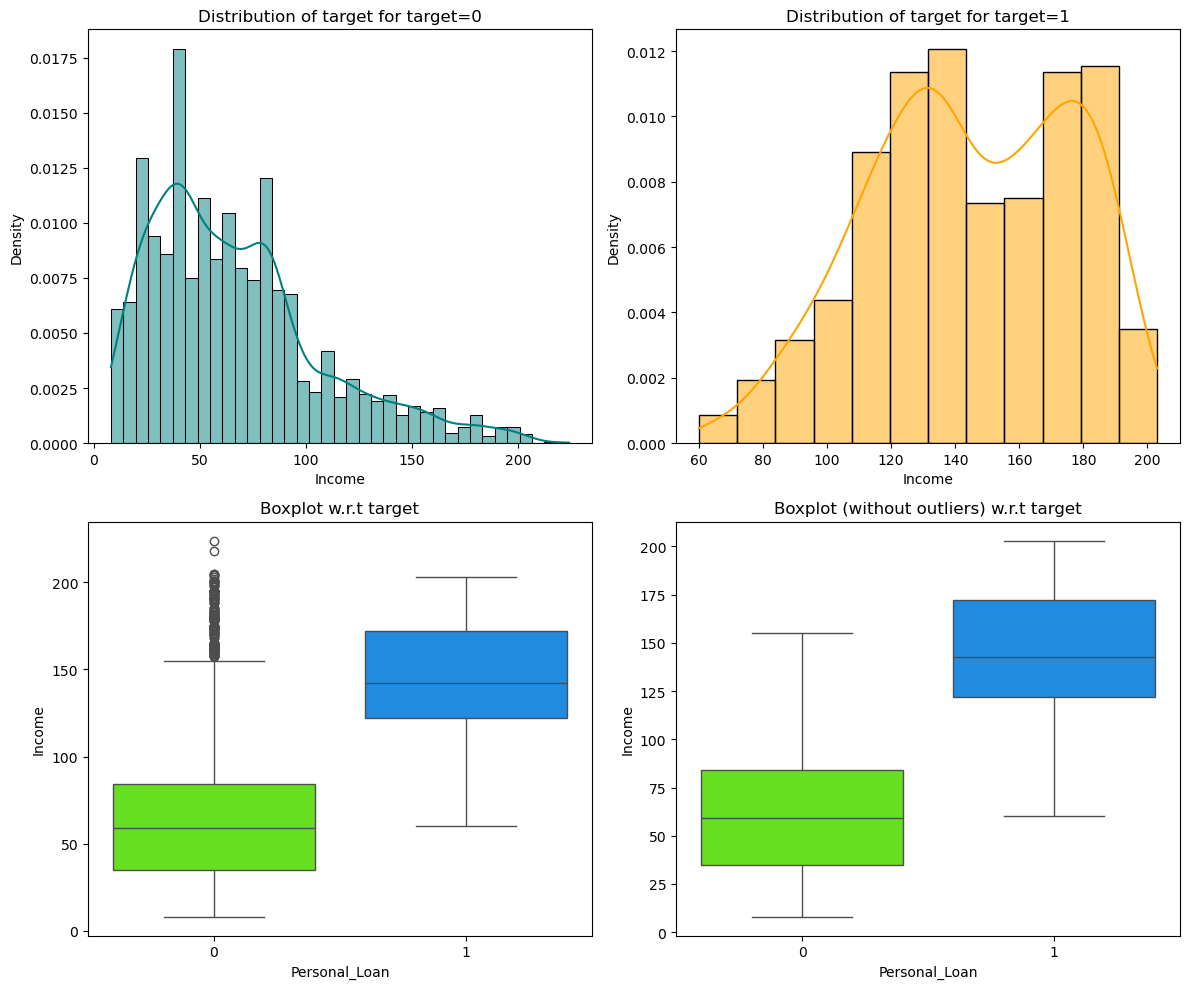


 Plotting for: ZIPCode


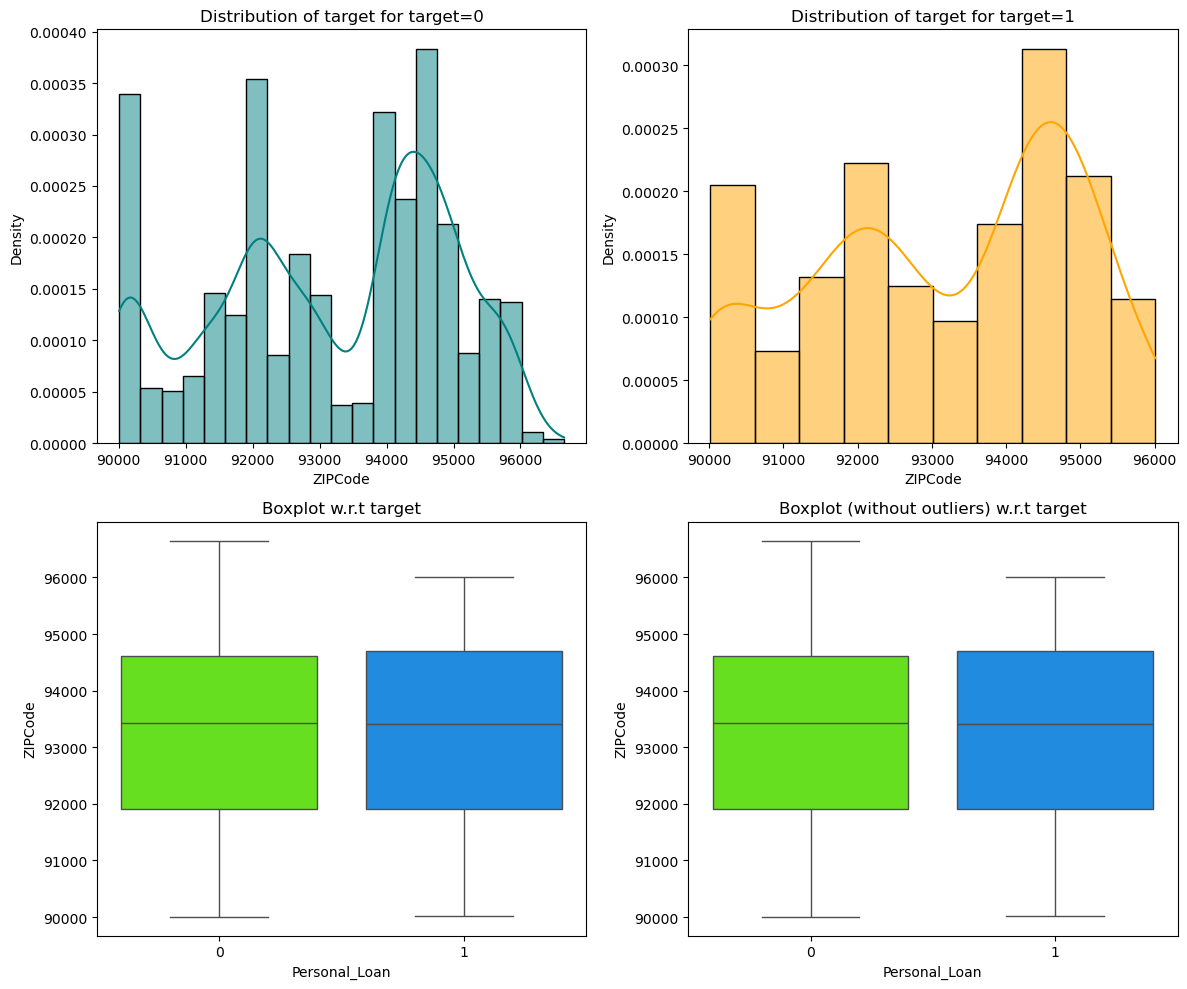


 Plotting for: CCAvg


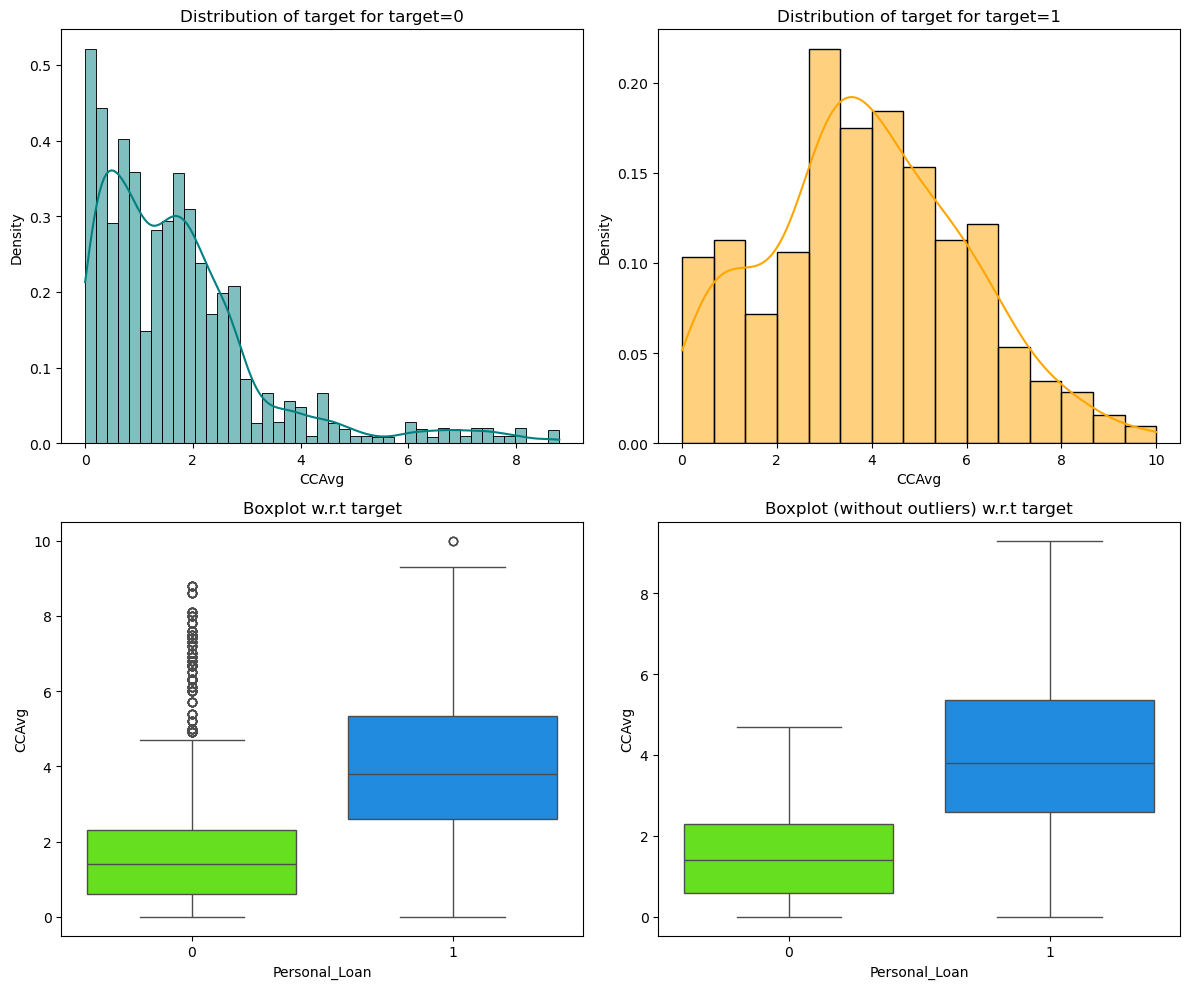


 Plotting for: Mortgage


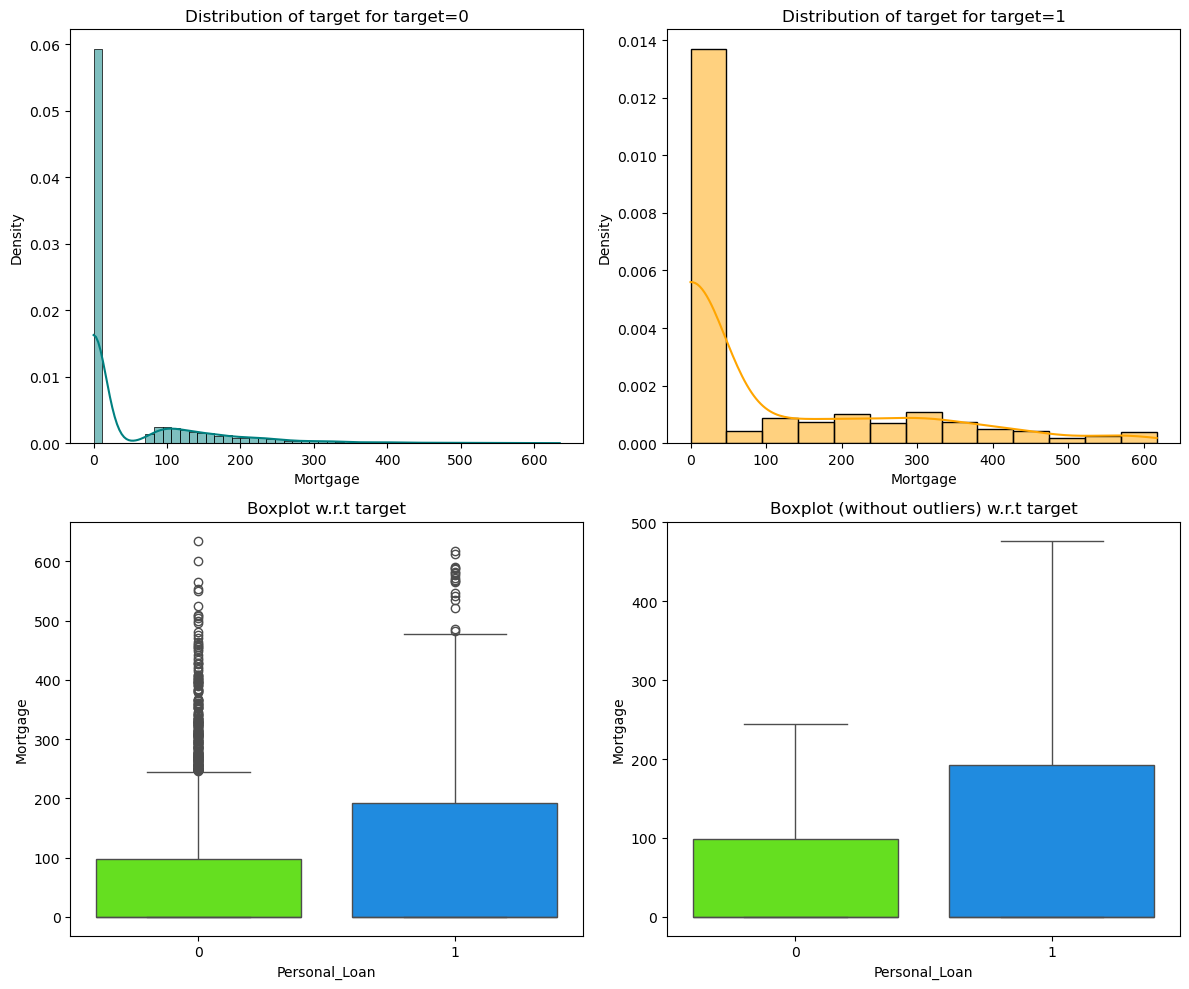

In [33]:
cols = [
        "Age",
        "Experience",
        "Income",
        "ZIPCode",
        "CCAvg",
        "Mortgage",
        "Personal_Loan",
    ]

for col in cols:
    if col != "Personal_Loan":
        print(f"\n Plotting for: {col}")
        distribution_plot_wrt_target(data, col, "Personal_Loan")

#### Observation:

1. Personal Loan Vs Age
   * We see equal no.of customers who accepted Loan and who didnot accept Loan w.r.t Age
   * Same Mean values observed for both
   * No Outliers seen from plot
 ---------------------------------------------------------------------------------------- 
2. Personal Loan Vs Experience
   * We see equal no.of customers who accepted Loan and who didnot accept Loan w.r.t Age
   * Same Mean values observed for both
   * No Outliers seen from plot
 ---------------------------------------------------------------------------------------- 
3. Personal Loan Vs Income
   * Customers who took loan generally have higher income.
   * Outliers seen for customers who have not accepted Personal Loan
   * Most customers who did not take personal Loan have lower income , around 30K - 60K range
   * There are few customer with very hig income, greater than 200K.
   * Plot indicated Income to be a strong factor in loan acceptance
 ---------------------------------------------------------------------------------------- 
4. Personal Loan Vs Zipcode
   * Doesn't seem to be a strong differentiator for personal loan accepted or not
   * Might be more useful when combined with other parameters.
 ---------------------------------------------------------------------------------------- 
5. Personal Loan Vs CCAvg
   * Customers with higher CCAvg are much more likely to take a personal loan
   * Customers who spend low on credit card are generally not taking personal loan
   * Outliers noticed for customers wo have not taken loan
   * CCAvg seem to have effect on predicting who gets personal loan
 ---------------------------------------------------------------------------------------- 
6. Personal Loan Vs Mortgage
    * Distribution right skewed.
    * Many customers in both groups have zero mortgages
    * Mortgage values are higher for customers who took loans
    * Outliers are present for both groups, but more seen in customers who have not taken loan

### Personal Loan Vs Family

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


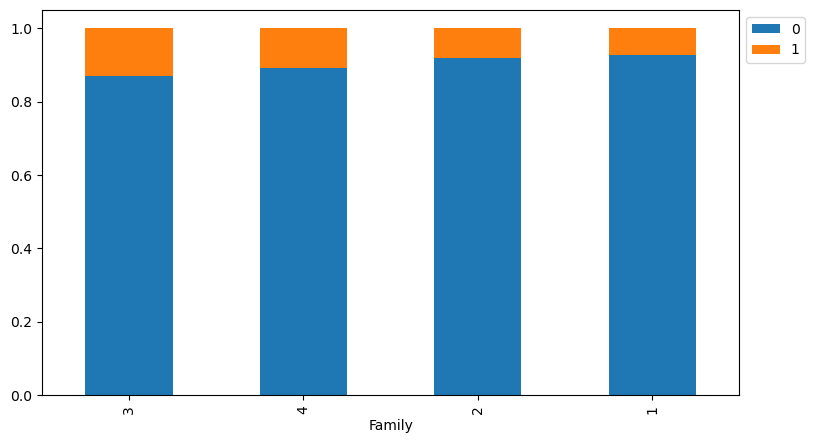

In [34]:
stacked_barplot(data, "Family", "Personal_Loan")

#### Observations:
1. Family size of 3 and 4 have taken more loans
2. Family size of 1 and 2 have lesser loans
3. This deffernce could be due to higher requirements or needs of a bigger family size.

### Personal Loan Vs Education

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


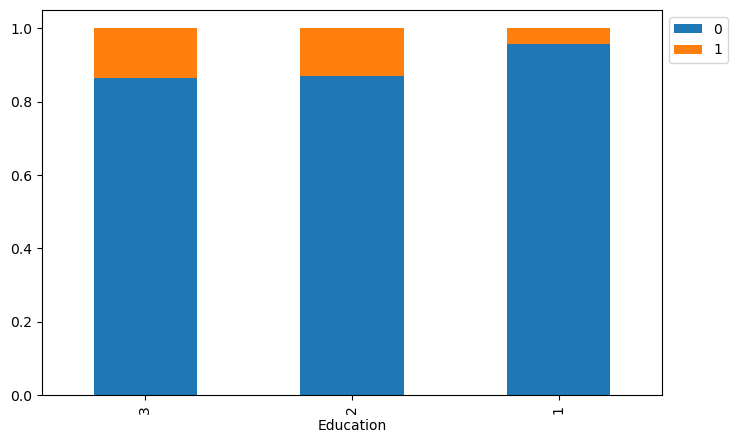

In [35]:
stacked_barplot(data, "Education", "Personal_Loan")

#### Observations:
1. Customers with higher education levels are likely to accept personal loan
2. Education level 3 (Advanced/Professional) has highest no.of loan takers
3. Education level 1 (Undergrad) has least no.of loan takers

### Personal Loan Vs Securities_Account

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


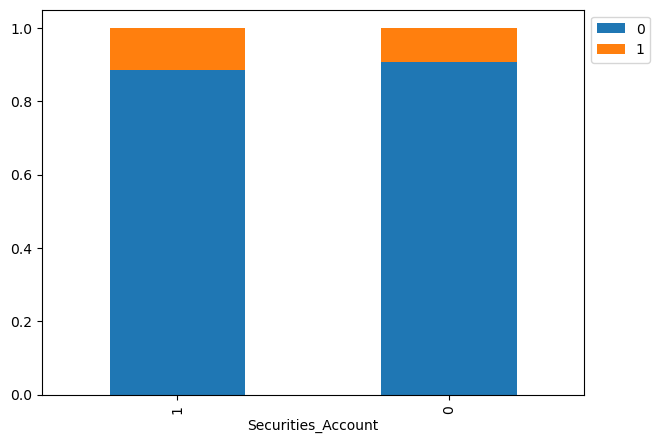

In [36]:
stacked_barplot(data, "Securities_Account", "Personal_Loan")

#### Observations:
1. No majore difference between customers with/without a Securities_Account likely to accept Loan
2. Majority in both groups did not take loans

### Personal Loan Vs CD_Account

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


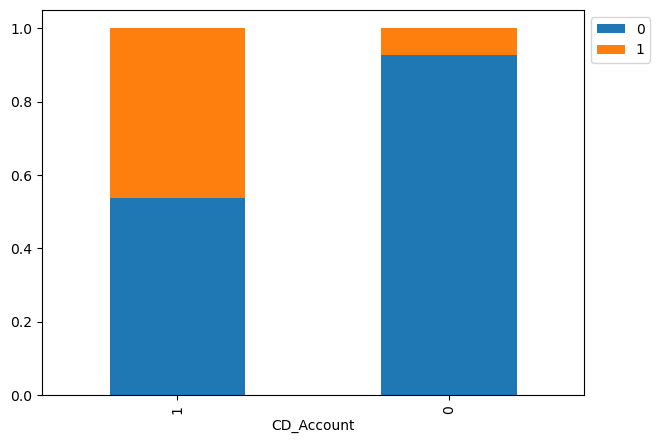

In [37]:
stacked_barplot(data, "CD_Account", "Personal_Loan")

#### Observations:
1. Customers having CD account are more likely to accept a loan
2. Almost 50% of customers having CD account have accepted loan

### Personal Loan Vs Online

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


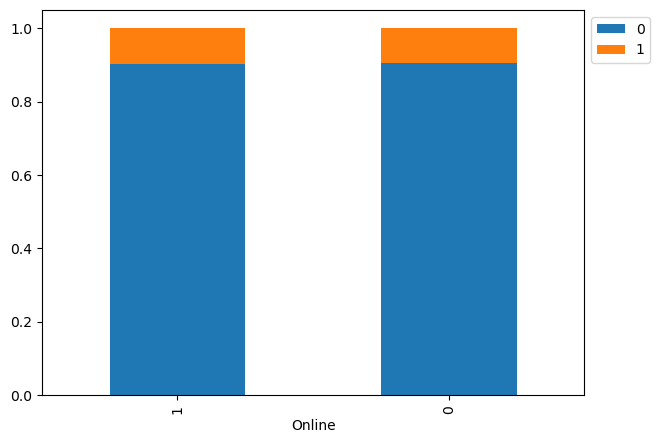

In [38]:
stacked_barplot(data, "Online", "Personal_Loan")

#### Observations:
1. Internet banking doesnot seem to have any impact deciding who takes personal loan
2. Customers with and without online banking facilties seem to have same effect

### Personal Loan Vs CreditCard

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


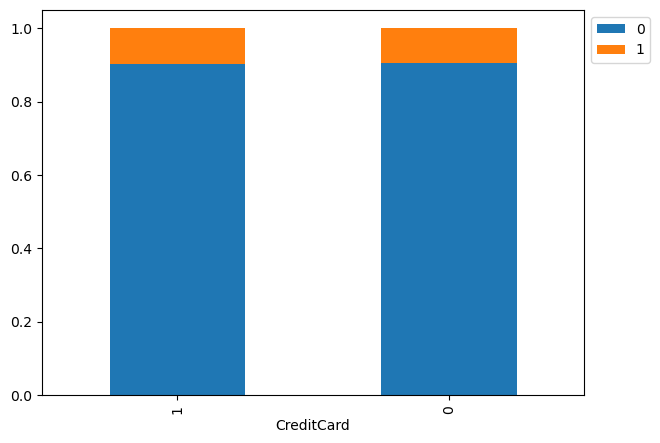

In [39]:
stacked_barplot(data, "CreditCard", "Personal_Loan")

#### Observations:
1. Cerdit card does not affect in deciding who takes personal loan

## Multivariate Analysis

### HeatMap to understand the correlation between the column data

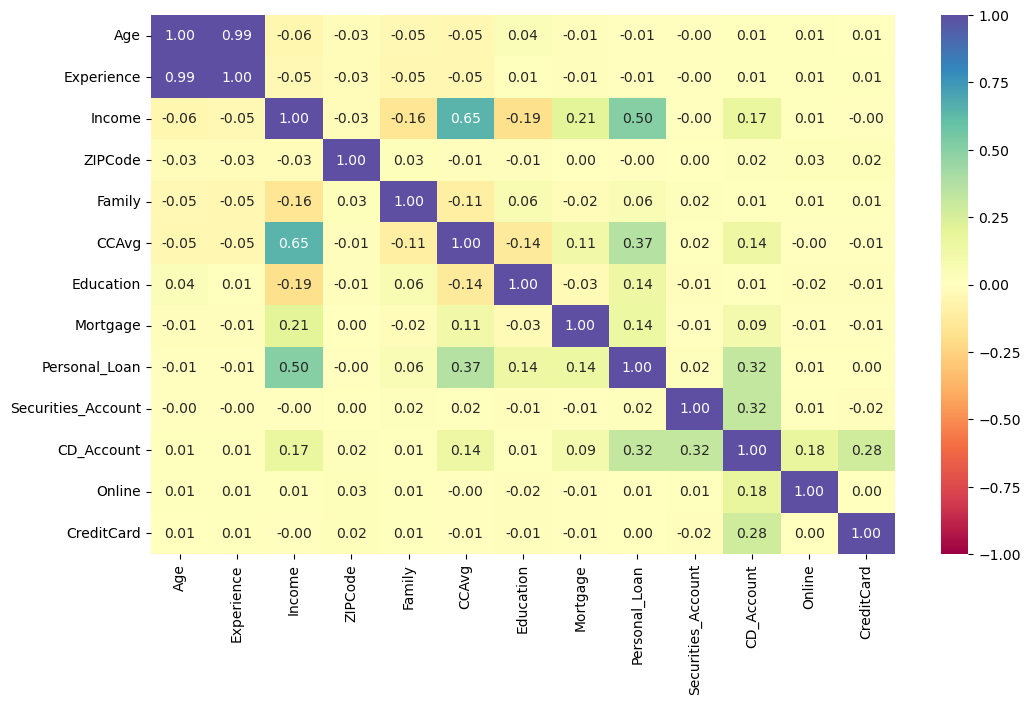

In [40]:
#Select all numeric data
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Observations:
1. Age and Experience have very high correlation (0.99)
2. Income shows strong positive correlation with taking a personal loan (0.50)
3. ZIPCode, Family, Online, CreditCard, Securities_Account show minimal correlation with loan status
4. CCAvg have crrelation of 0.37 with personal loan

### Pair Plot

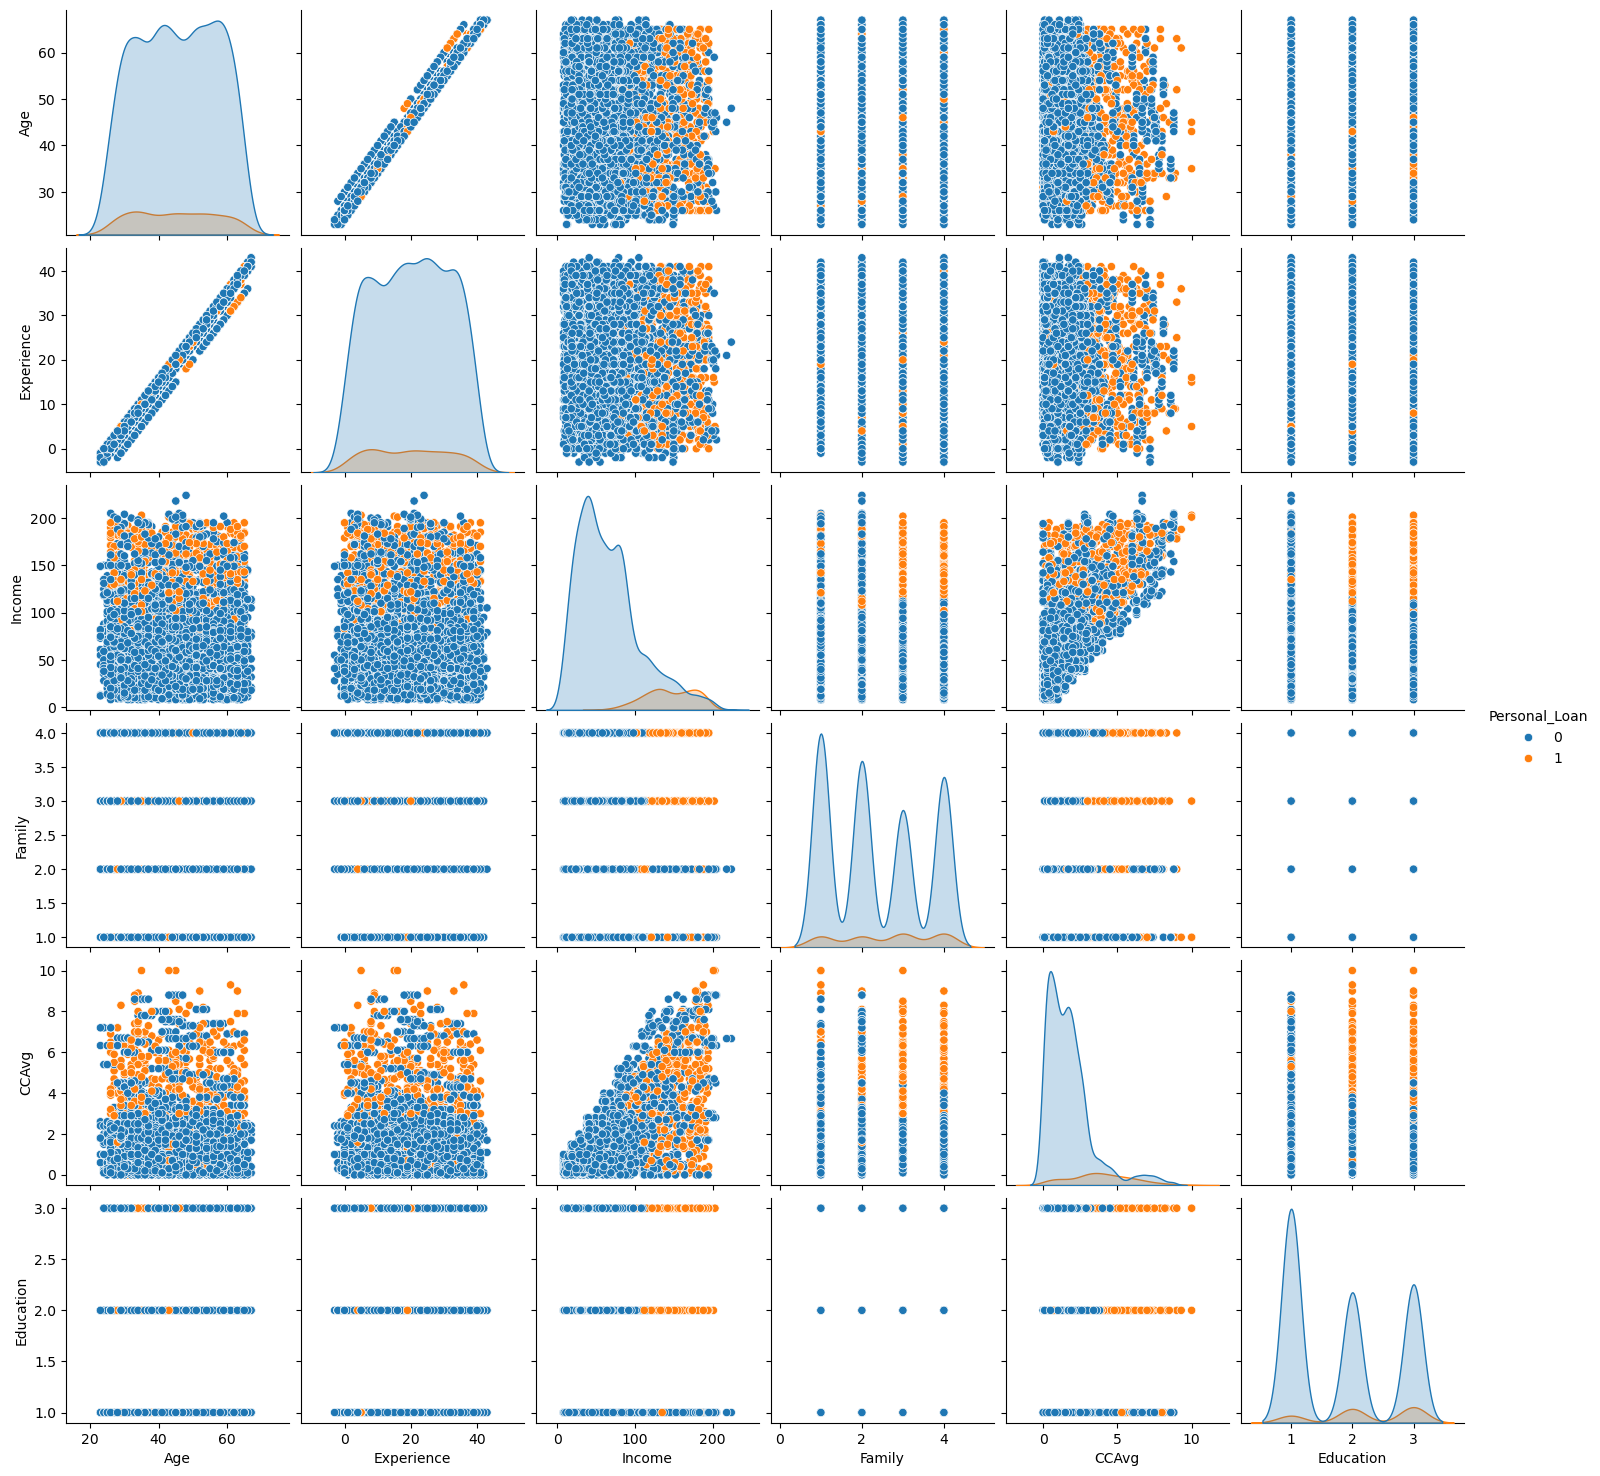

In [41]:
data2 = data[['Age', 'Experience', 'Income','Family','CCAvg','Personal_Loan','Education']]
sns.pairplot(data2,hue='Personal_Loan')

#### Observations:
1. Higher the Income, Education, CCAvg - higher the chances to accept personal loan
2. Negatice experience values are noticed. Needs to handles during data preparation
3. Other major observations were already discussed above. 

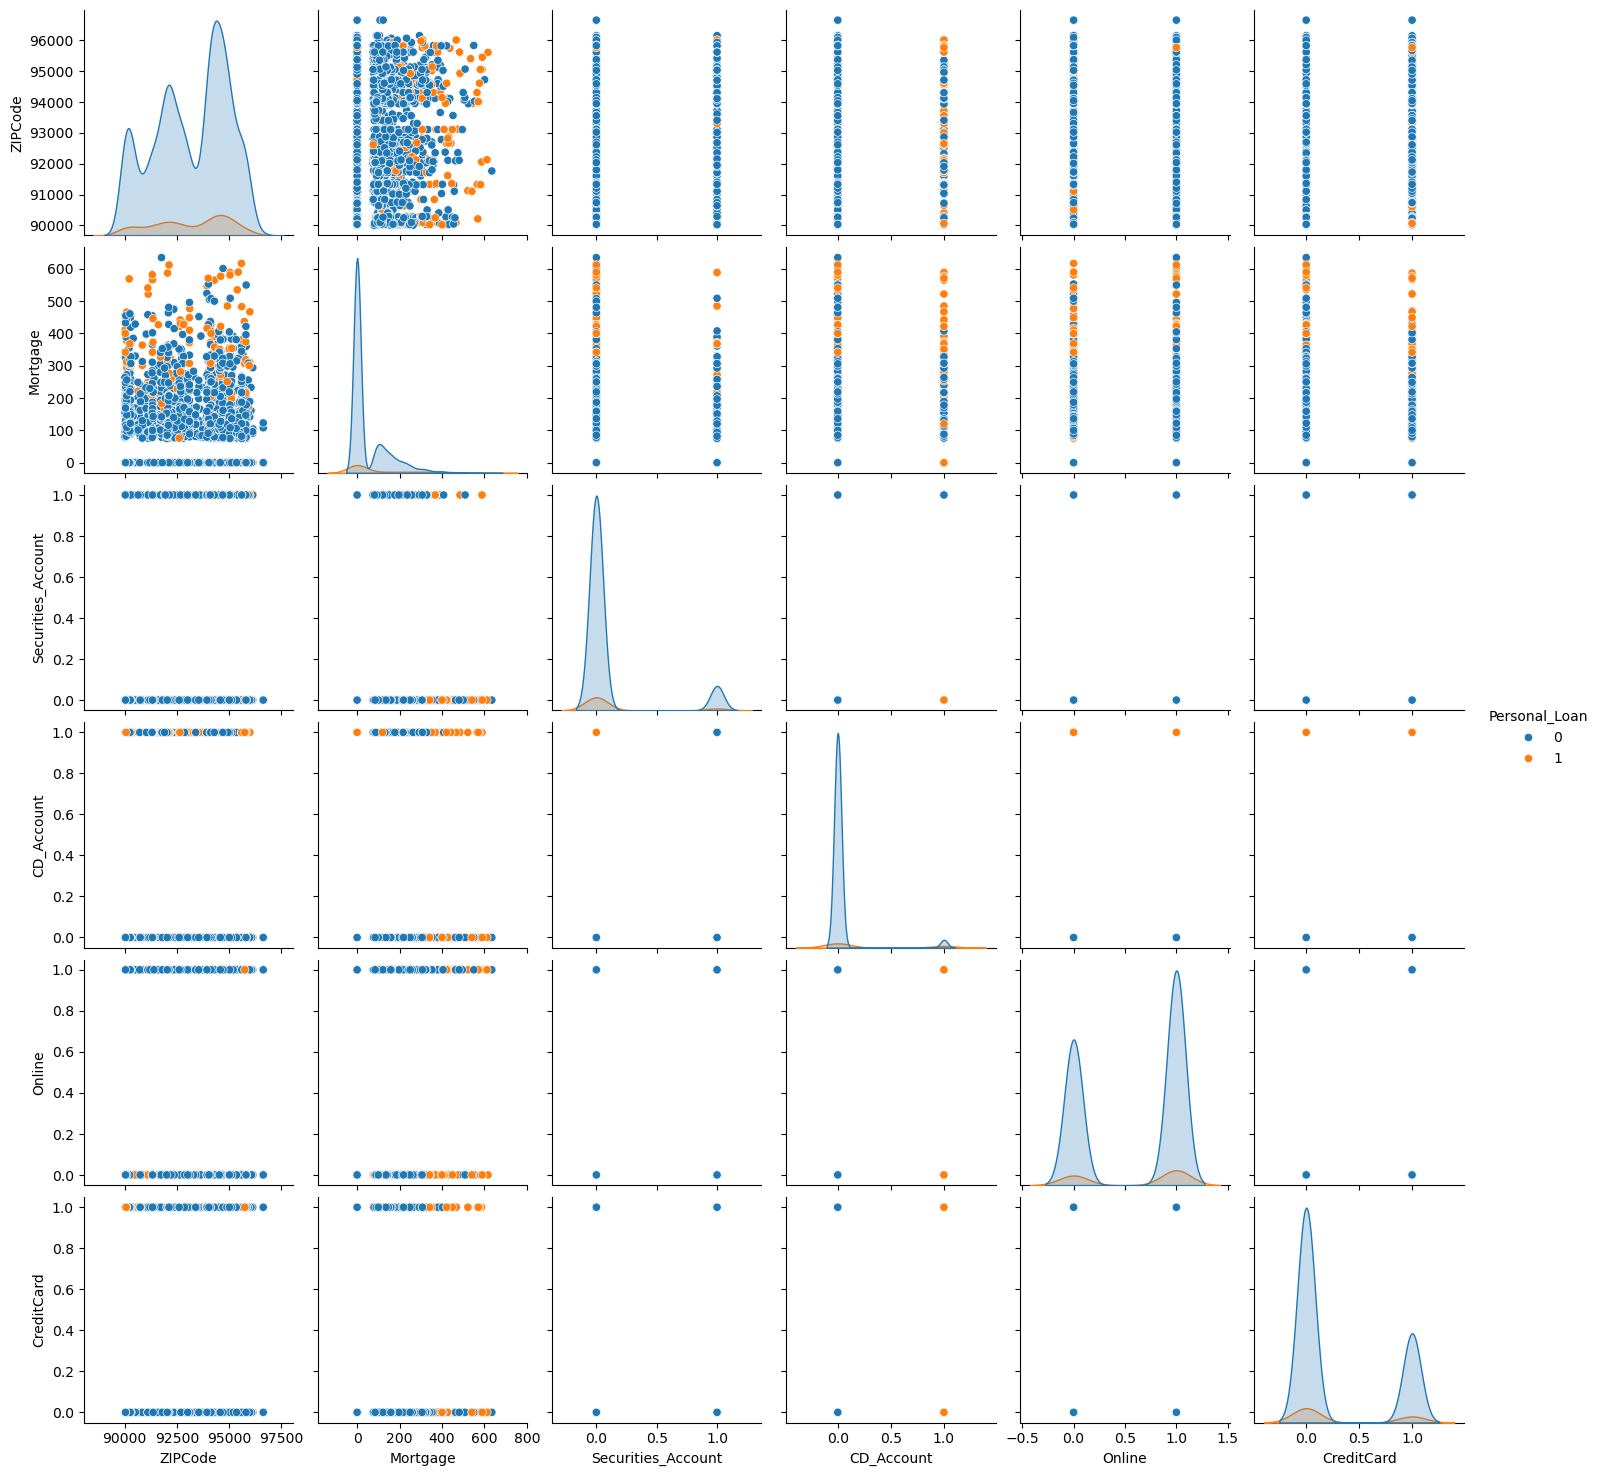

In [42]:
data3 = data[[ 'ZIPCode','Mortgage', 'Securities_Account','CD_Account','Online','Personal_Loan','CreditCard']]
sns.pairplot(data3,hue='Personal_Loan')

#### Observations:
1. CD_Account seem to have good impact on predicting who might accept loan or not
2. Most variables are binary. Might require further analysis
3. No clear pattern shown Zipcode
4. Other major observations were already discussed above.

### Data Preprocessing

### Handling Zipcode column

In [43]:
# library required to convert zipcode to county

from uszipcode import SearchEngine

search = SearchEngine()

#Using "County" as location as other options( are givng a large no.of of outputs.

def zipcode_convert(zipcode):    
    location = search.by_zipcode(zipcode)
    if location:
        return f"{location.county}"
    else:
        return np.nan

In [44]:
# Apply zipcode_convert function to our dataset
data["Location"] = data["ZIPCode"].apply(zipcode_convert)
data.head(10)

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   25           1      49    91107       4    1.6          1         0   
1   45          19      34    90089       3    1.5          1         0   
2   39          15      11    94720       1    1.0          1         0   
3   35           9     100    94112       1    2.7          2         0   
4   35           8      45    91330       4    1.0          2         0   
5   37          13      29    92121       4    0.4          2       155   
6   53          27      72    91711       2    1.5          2         0   
7   50          24      22    93943       1    0.3          3         0   
8   35          10      81    90089       3    0.6          2       104   
9   34           9     180    93023       1    8.9          3         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   
5              0                   0           0       1           0   
6              0                   0           0       1           0   
7              0                   0           0       0           1   
8              0                   0           0       1           0   
9              1                   0           0       0           0   

               Location  
0    Los Angeles County  
1    Los Angeles County  
2        Alameda County  
3  San Francisco County  
4    Los Angeles County  
5      San Diego County  
6    Los Angeles County  
7       Monterey County  
8    Los Angeles County  
9        Ventura County

In [45]:
#get unique value counts in each column 
data.nunique()

Age                    45
Experience             47
Income                162
ZIPCode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal_Loan           2
Securities_Account      2
CD_Account              2
Online                  2
CreditCard              2
Location               38
dtype: int64

#### Observation:
1. There are 38 unique values of Location obtained from 467 zipcodes

In [46]:
#printing all unique values of location
unique_values = data['Location'].unique()
print(unique_values)

['Los Angeles County' 'Alameda County' 'San Francisco County'
 'San Diego County' 'Monterey County' 'Ventura County'
 'Santa Barbara County' 'Marin County' 'Santa Clara County'
 'Santa Cruz County' 'San Mateo County' 'Humboldt County'
 'Contra Costa County' 'Orange County' 'Sacramento County' 'Yolo County'
 'Placer County' 'San Bernardino County' 'San Luis Obispo County'
 'Riverside County' 'Kern County' nan 'Fresno County' 'Sonoma County'
 'El Dorado County' 'San Benito County' 'Butte County' 'Solano County'
 'Mendocino County' 'San Joaquin County' 'Imperial County'
 'Siskiyou County' 'Merced County' 'Trinity County' 'Stanislaus County'
 'Shasta County' 'Tuolumne County' 'Napa County' 'Lake County']


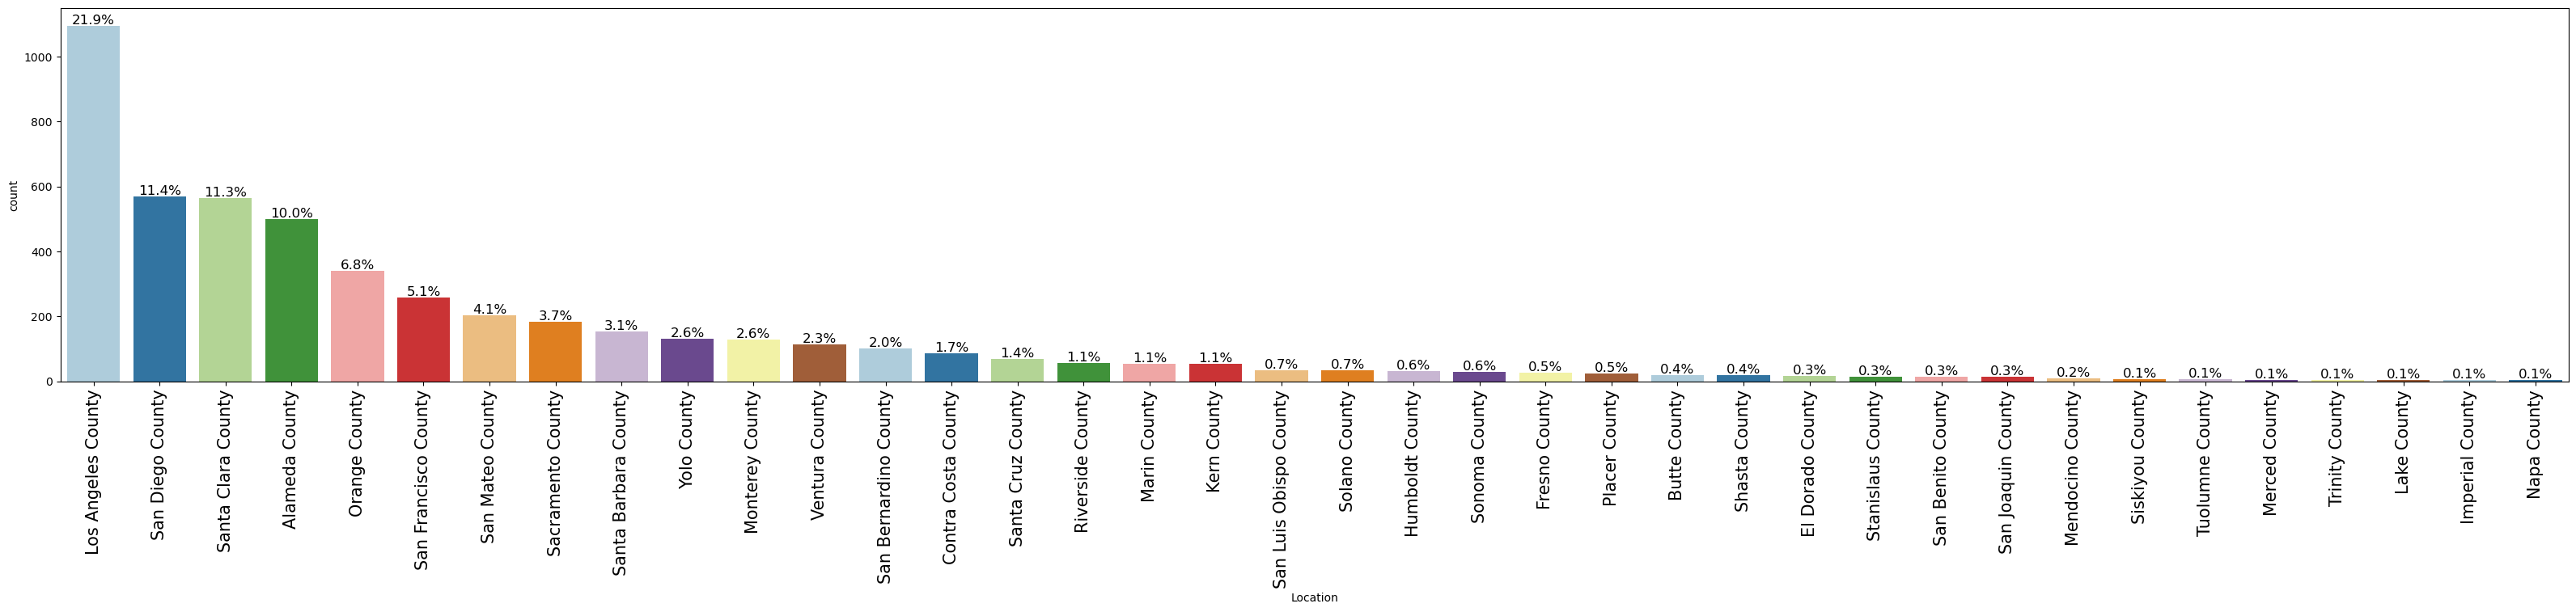

In [47]:
#barplot for location column 

labeled_barplot(data, "Location", perc=True)

#### Observations:
1. Most no.of customers reside in Los Angeles County with 21.9% of overall data
2. San Diego County has next with 11.4% data
3. Santa Clara County is thrid with 11.3% of data

### Handling -ve values in Experience column

In [48]:
#Get all unique values in Experience
data["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43], dtype=int64)

#### Observations:
* There are few customers having total experience in -ve values
* This cannot happen in real world scenario. 

In [49]:
#Get total total number of rows with negative Experience
data[data["Experience"] < 0].value_counts().sum()

51

#### Observation:
* There are total 51 rows where customers have -ve value as experience 

### To understand how the values are spread in the dataset for Experience column, we are performing a check for values of Experience Vs. Age, Income and Education 

In [50]:
#Compare Experience < 0 with Age 
data[data['Experience'] < 0]['Age'].describe()

count    52.000000
mean     24.519231
std       1.475159
min      23.000000
25%      24.000000
50%      24.000000
75%      25.000000
max      29.000000
Name: Age, dtype: float64

In [51]:
#Compare Experience >= 0 with Age 
data[data['Experience'] >= 0]['Age'].describe()

count    4948.000000
mean       45.557195
std        11.320735
min        24.000000
25%        36.000000
50%        46.000000
75%        55.000000
max        67.000000
Name: Age, dtype: float64

In [52]:
#Compare Experience < 0 with Income
data[data['Experience'] < 0]['Income'].describe()

count     52.000000
mean      69.942308
std       37.955295
min       12.000000
25%       40.750000
50%       65.500000
75%       86.750000
max      150.000000
Name: Income, dtype: float64

In [53]:
#Compare Experience >= 0 with Income
data[data['Experience'] >= 0]['Income'].describe()

count    4948.000000
mean       73.814470
std        46.112596
min         8.000000
25%        39.000000
50%        64.000000
75%        98.000000
max       224.000000
Name: Income, dtype: float64

In [54]:
#Compare Experience < 0 with Education
data[data['Experience'] < 0]['Education'].value_counts()

Education
3    20
2    16
1    16
Name: count, dtype: int64

In [55]:
#Compare Experience >= 0 with Education
data[data['Experience'] >= 0]['Education'].value_counts()

Education
1    2080
3    1481
2    1387
Name: count, dtype: int64

#### Observations:
1. Based on the analysis of Experience Vs. Age, Income and Education, there doesnt seem to be any pattern involved.
2. In reality this will never occur.
3. Therefore using the median value to replace all the -ve experience values.

In [56]:
# Using median value to replace all negative values in Experience column
median_experience = data[data['Experience'] >= 0]['Experience'].median()
data.loc[data['Experience'] < 0, 'Experience'] = median_experience

In [57]:
#Get total total number of rows with negative Experience
data[data["Experience"] < 0].value_counts().sum()

0

In [58]:
#Get unique values Iin experience
data["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43], dtype=int64)

#### Observation.
* There are no longer any negative Experience in the dataset
* All -ve values replaced with median age = 20

### Outlier detection 

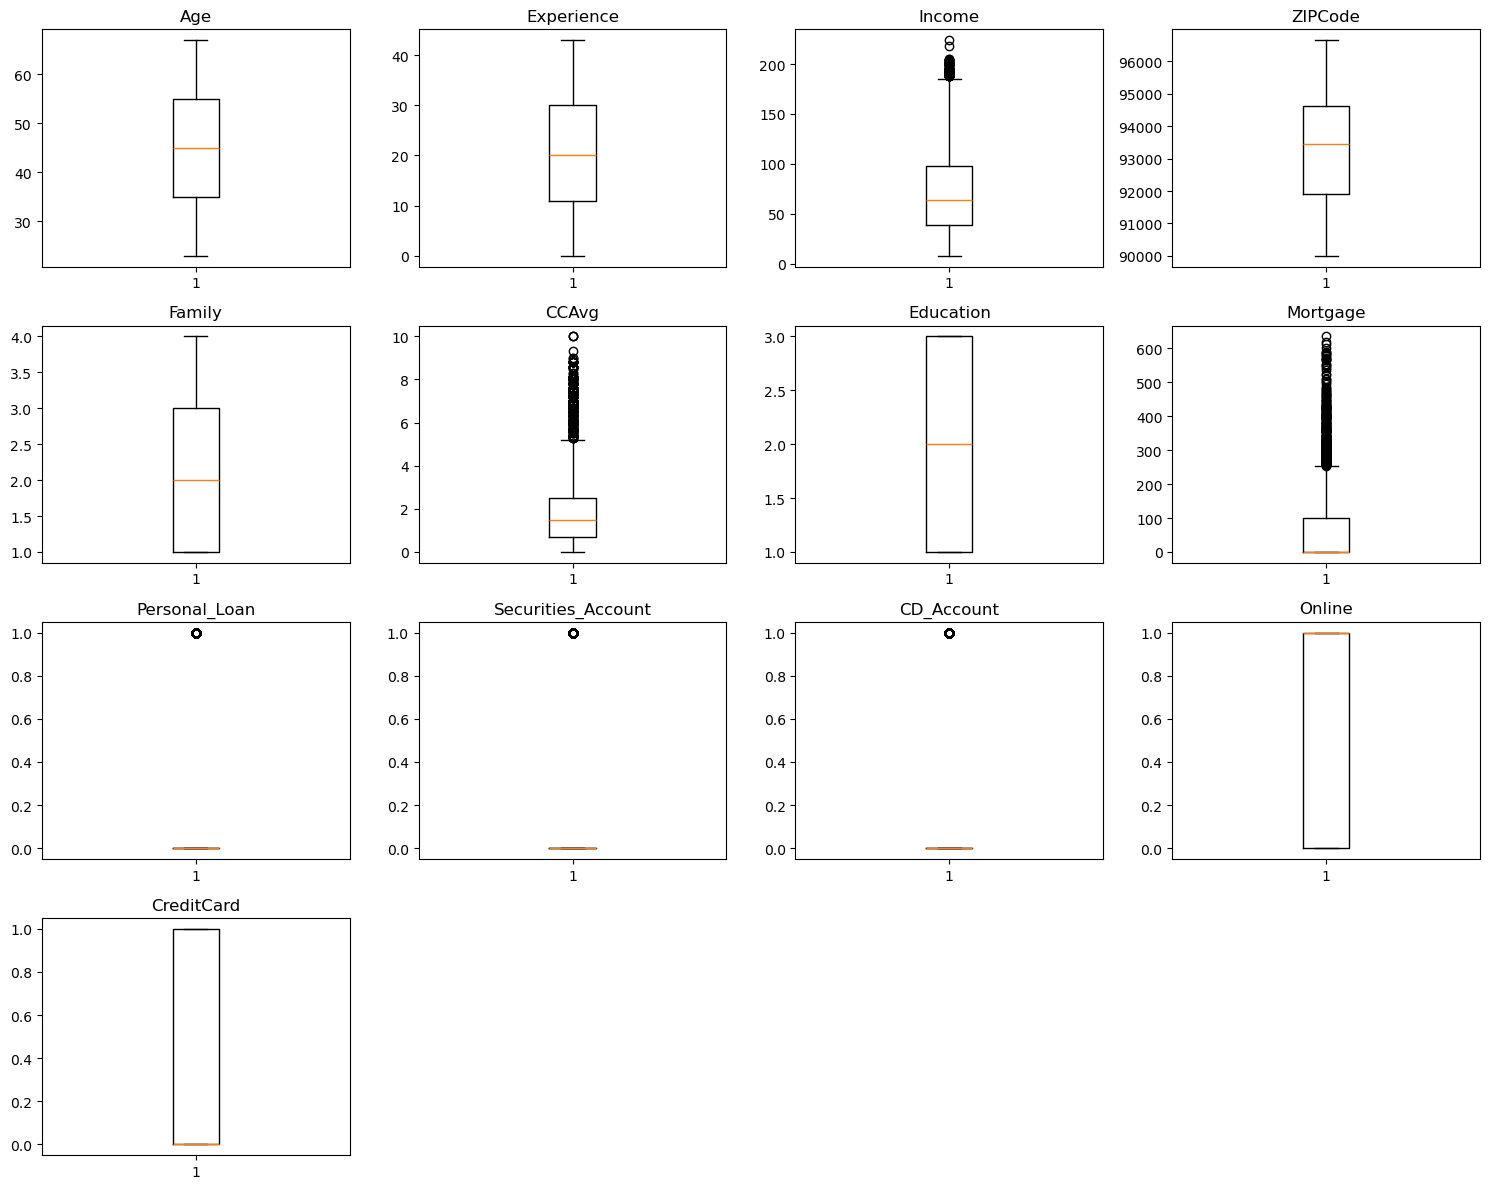

In [59]:
# outlier detection using boxplot. Getting all numerical cols
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Observations
1. There are quite a few outliers in the data.
2. However, we will not treat them as they are proper values

### Data Preparation for Modeling

In [60]:
print(data.columns)

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard', 'Location'],
      dtype='object')


In [61]:
# Dropping Personal_Loan, ZIPCode from X datset
X = data.drop(["Personal_Loan","ZIPCode"], axis=1)
Y = data["Personal_Loan"]

X = pd.get_dummies(X, drop_first=True)

X = X.astype(float)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [62]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 48)
Shape of test set :  (1500, 48)
Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


* We had seen that around 90.5% of observations belongs to class 0 (didnot get personal loan) and 9.45% observations belongs to class 1 (got personal loan), and this is preserved in the train and test sets

## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions as:**

- Model predicts NO, but in reality the customer would accept the loan. (False Negative - FN)
- Model predicts YES, but the customer actually won’t accept. (False Positive - FP)


**Which case is more important?**

- Opportunity loss will be the greater loss as the bank will lose revenue and possibly the customer 
- False Negative is more important

**How to reduce the losses?**
- The company would want the recall to be maximized, greater the recall score higher are the chances of minimizing the False Negatives.

In [63]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [64]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Decision Tree (default)

In [65]:
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

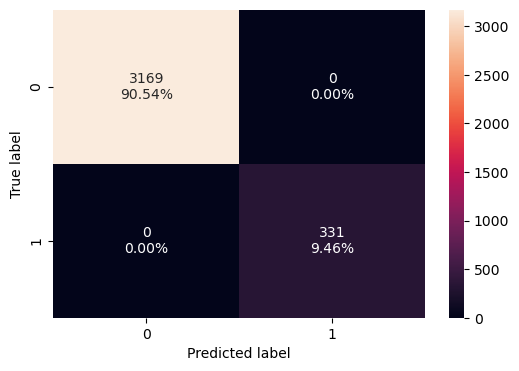

In [66]:
confusion_matrix_sklearn(model1, X_train, y_train)

In [67]:
#Check performace on train set
decision_tree_default_perf_train = model_performance_classification_sklearn(
    model1, X_train, y_train
)
decision_tree_default_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

#### Observations:
1. The Decision Tree seem to be overfit
2. This is making model to predict all accurately without any errors

### Model performs in TEST dataset

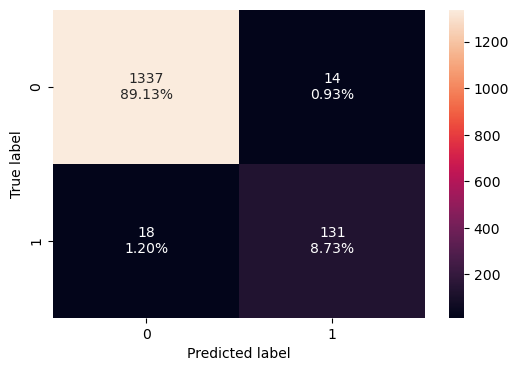

In [68]:
confusion_matrix_sklearn(model1, X_test, y_test)

In [69]:
#Check performace on test set
decision_tree_default_perf_test = model_performance_classification_sklearn(
    model1, X_test, y_test
)
decision_tree_default_perf_test

Accuracy    Recall  Precision        F1
0  0.978667  0.879195   0.903448  0.891156

#### Observations:
1. When run for Test dataset, we see there are reduction in all parameter values

In [70]:
# Gini importance of features in the tree building

print(
    pd.DataFrame(
        model1.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                      Imp
Education                        0.408303
Income                           0.312134
Family                           0.151725
CCAvg                            0.049212
CD_Account                       0.027936
Age                              0.027750
Experience                       0.008024
Mortgage                         0.005557
Location_Riverside County        0.003544
Location_San Diego County        0.002224
Location_San Francisco County    0.001608
Location_Santa Barbara County    0.001422
Online                           0.000561
Location_San Bernardino County   0.000000
Location_Ventura County          0.000000
Location_San Joaquin County      0.000000
Location_San Luis Obispo County  0.000000
Location_San Mateo County        0.000000
Location_Santa Clara County      0.000000
Location_Tuolumne County         0.000000
Location_Santa Cruz County       0.000000
Location_Shasta County           0.000000
Location_Siskiyou County         0

In [71]:
feature_names = list(X_train.columns)
importances = model1.feature_importances_
importances

array([0.02775037, 0.00802398, 0.31213442, 0.15172479, 0.04921221,
       0.40830254, 0.00555664, 0.        , 0.02793592, 0.00056079,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00354378, 0.        , 0.        ,
       0.        , 0.00222447, 0.00160818, 0.        , 0.        ,
       0.        , 0.00142189, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [72]:
indices = np.argsort(importances)

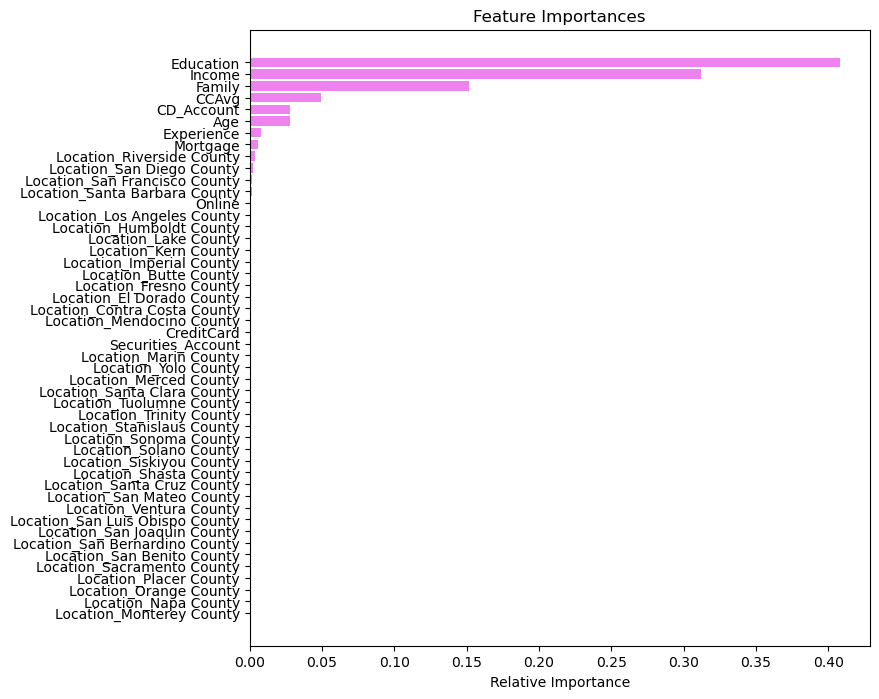

In [73]:
# importance of features in the tree building

importances = model1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

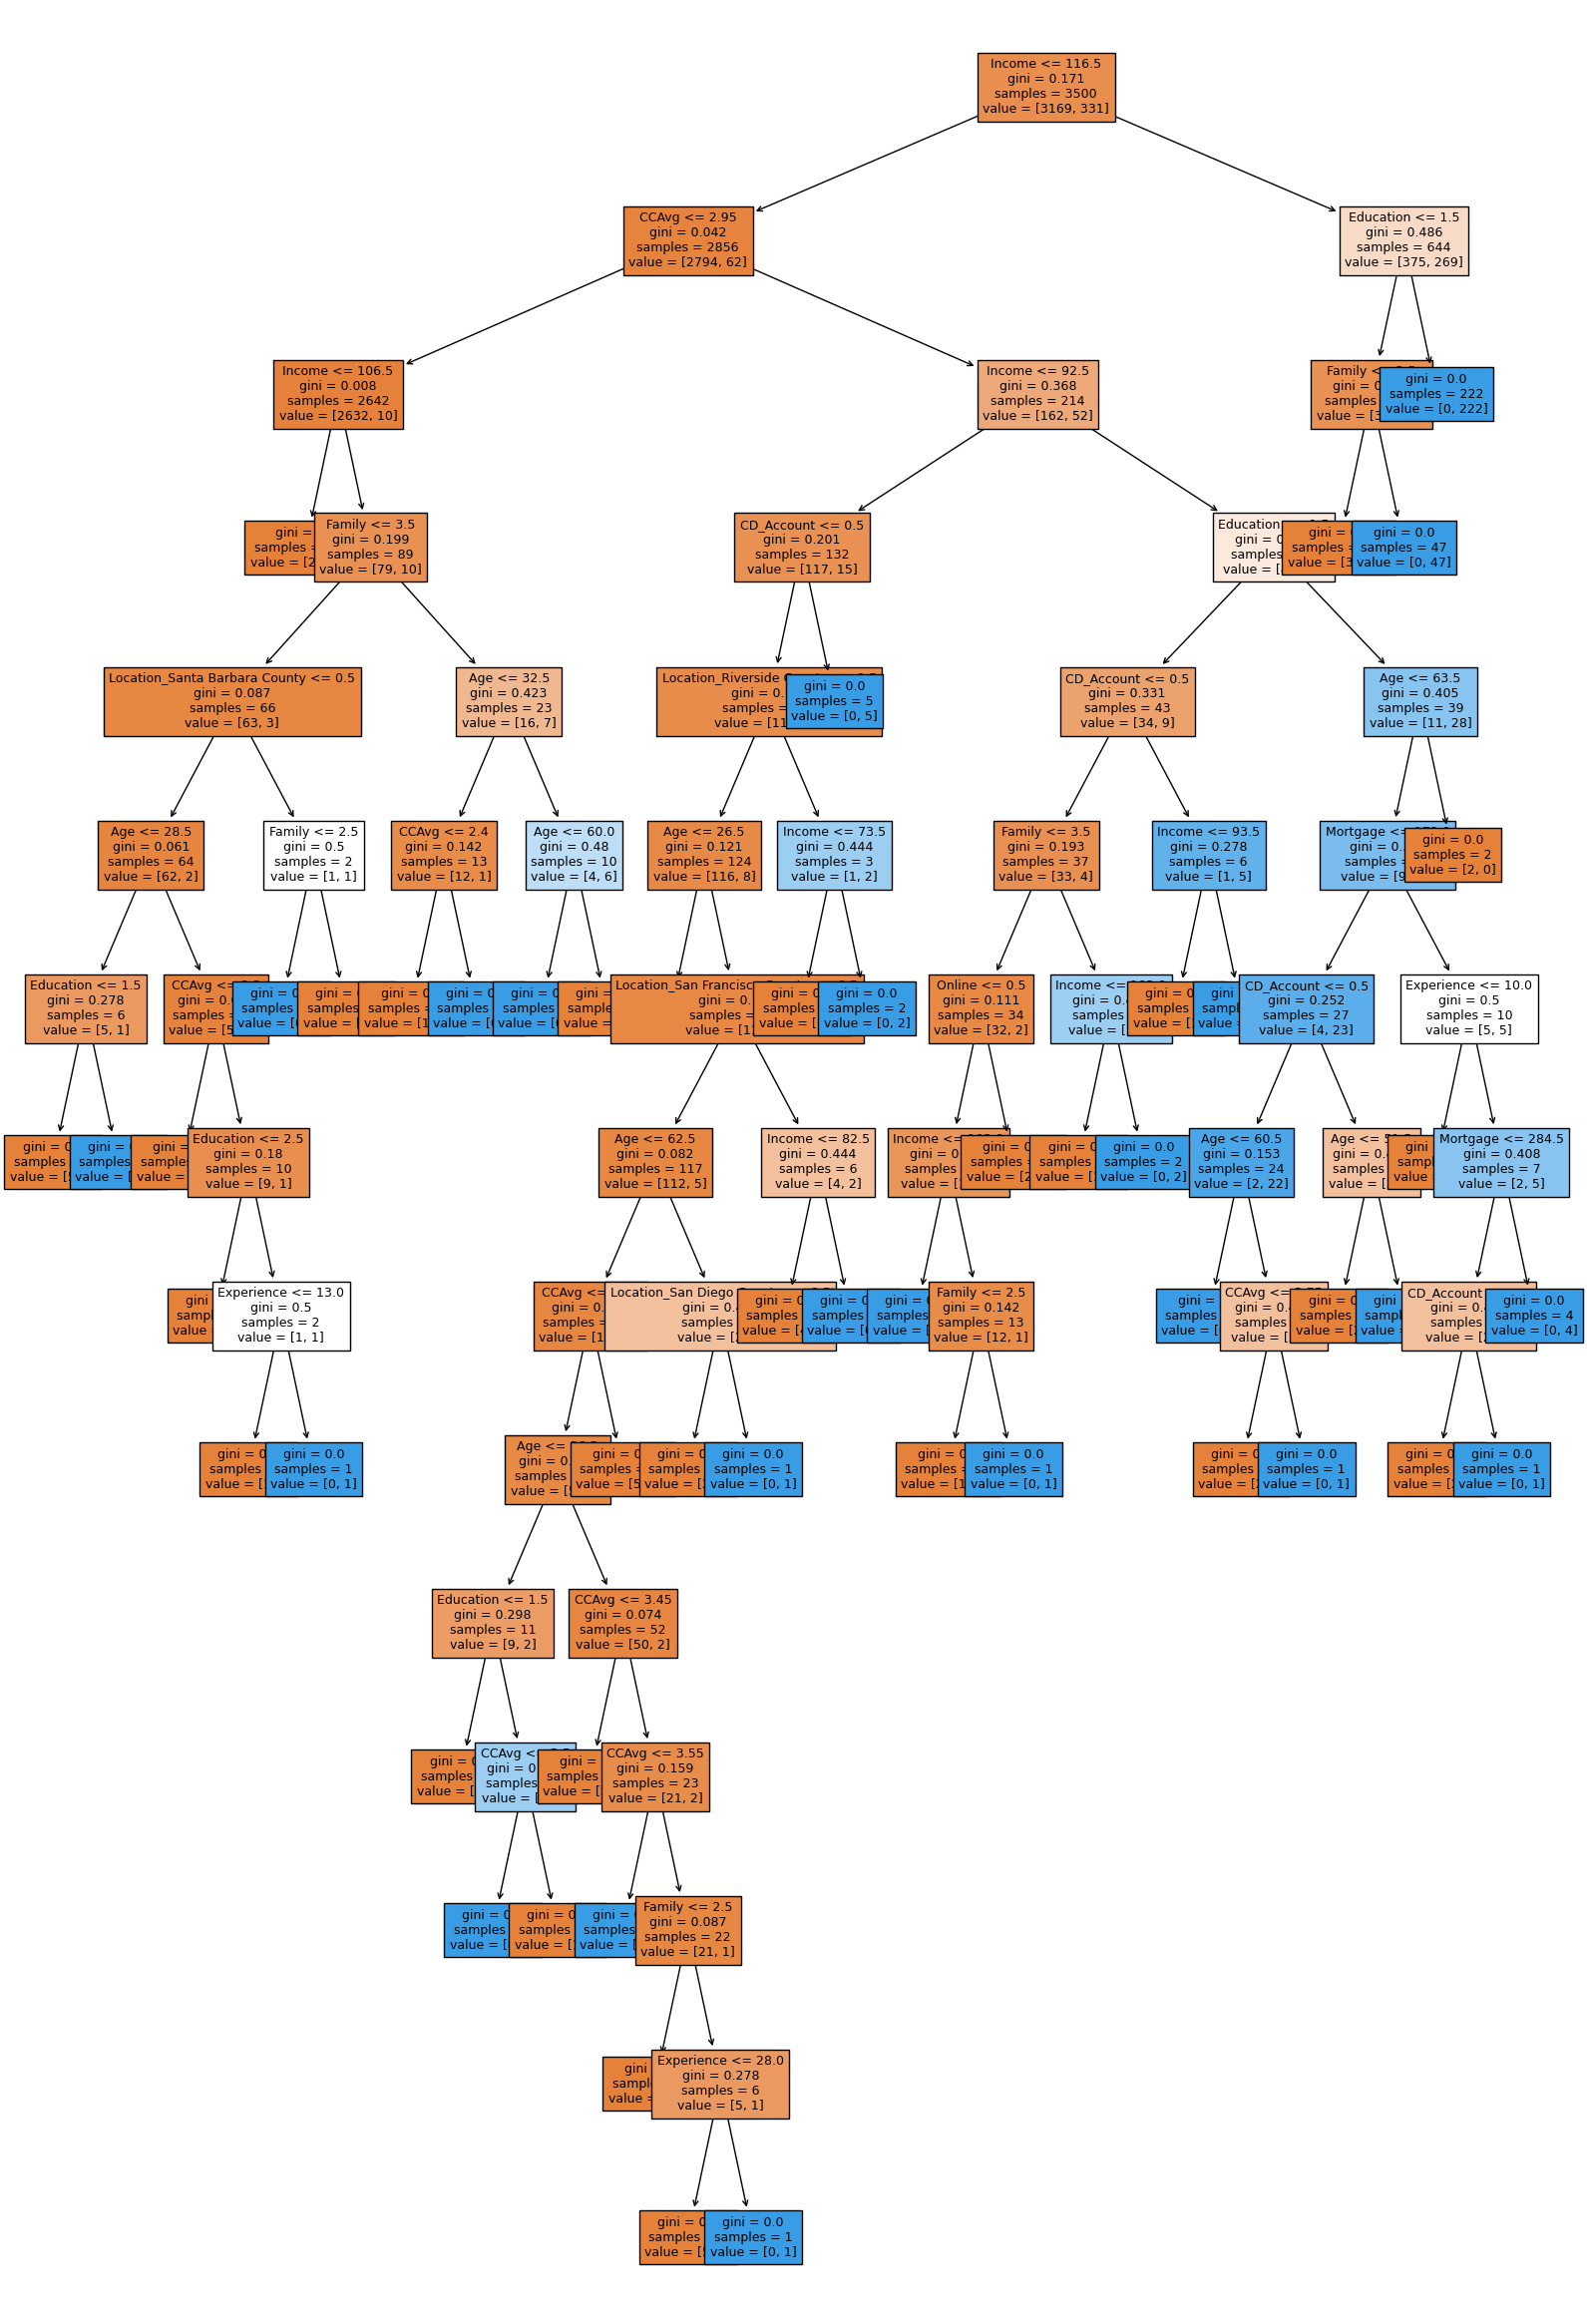

In [74]:
#Plot the figure
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model1,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

#### Observations:
1. Education, Income, Family, CCAvg, CD Account are the top 5 important features
2. The default model seem to overfit and thus giving high scores for test data and we see the same refelctig in train dataset as well.

### Decision Tree (with class_weights)

* In an imbalanced dataset, a standard Decision Tree might mostly predict the majority class to maximize accuracy, but this leads to poor performance    on minority class
* In this case, we will set class_weight = "balanced", which will automatically adjust the weights to be inversely proportional to the class    frequencies in the input data
* class_weight is a hyperparameter for the decision tree classifier

In [75]:
model2 = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

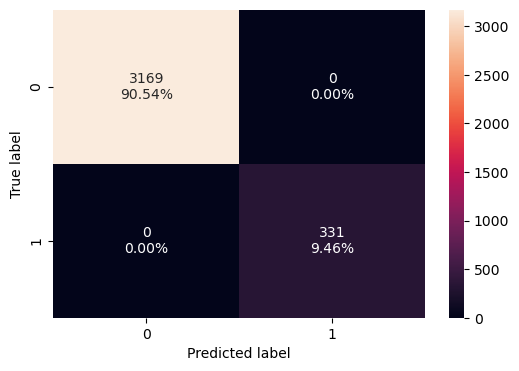

In [76]:
confusion_matrix_sklearn(model2, X_train, y_train)

In [77]:
#Check performace on train set
decision_tree_perf_train = model_performance_classification_sklearn(
    model2, X_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

#### Observations:
* Model able to perfectly classify all data points on Training set
* This is an indiaction of an overfitting model

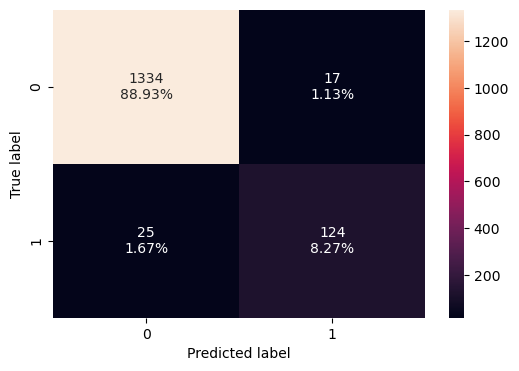

In [78]:
confusion_matrix_sklearn(model2, X_test, y_test)

In [79]:
#Check performace on test set
decision_tree_perf_test = model_performance_classification_sklearn(
    model2, X_test, y_test
)
decision_tree_perf_test

Accuracy    Recall  Precision        F1
0     0.972  0.832215   0.879433  0.855172

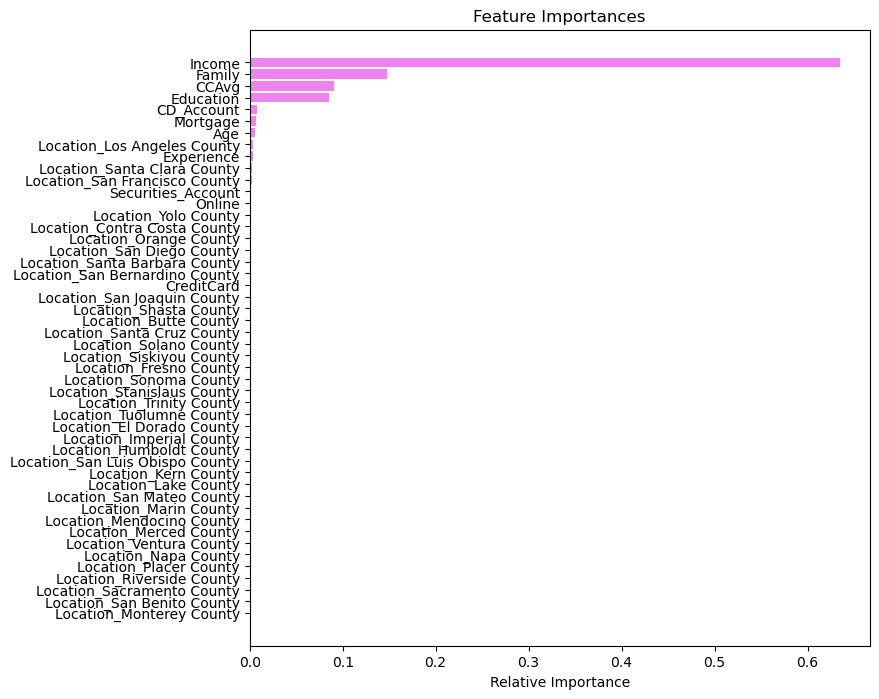

In [80]:
# importance of features in the tree building

importances = model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations:
* Top Predictors: Income, Family, CCAvg, Education
* Disparity in performance of the model noticed when performed in test set.
* Model is overfitted
* Class weights likely improved recall score

### Let's use pruning techniques to try and reduce overfitting.


### Decision Tree (Pre-pruning)

* Pre-pruning is a technique used in Decision Tree algorithms to prevent overfitting by halting the growth of the tree early

### Manually Tuned Pre-Pruned Decision Tree 

In [81]:
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(5, 10, 15)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=42
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")

Best parameters found:
Max depth: 5
Max leaf nodes: 50
Min samples split: 10
Best test recall score: 0.959731543624161


In [82]:
# creating an instance of the best model
model3 = best_estimator

# fitting the best model to the training data
model3.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=50,
                       min_samples_split=10, random_state=42)

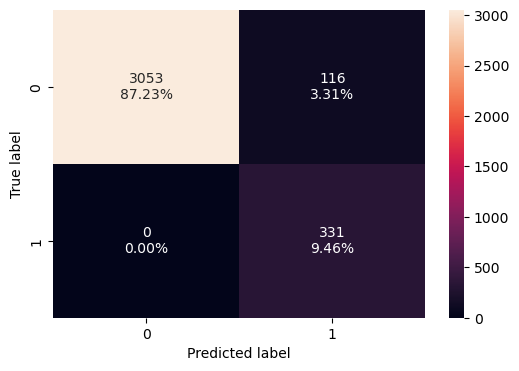

In [83]:
confusion_matrix_sklearn(model3, X_train, y_train)

In [84]:
#Checking performance on Trains et
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    model3, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy  Recall  Precision      F1
0  0.966857     1.0   0.740492  0.8509

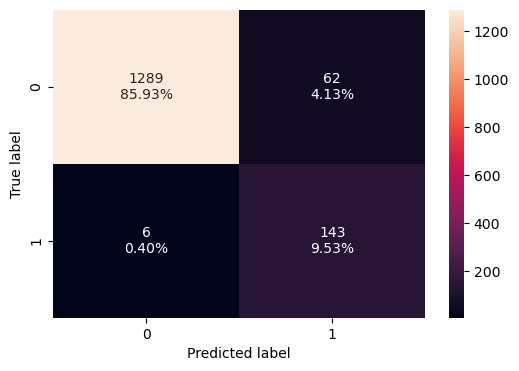

In [85]:
confusion_matrix_sklearn(model3, X_test, y_test)

In [86]:
#Checking performance on test set
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    model3, X_test, y_test
)
decision_tree_tune_perf_test

Accuracy    Recall  Precision       F1
0  0.954667  0.959732   0.697561  0.80791

In [87]:
importances = model3.feature_importances_
indices = np.argsort(importances)

In [88]:
importances

array([0.00188618, 0.        , 0.65902273, 0.149222  , 0.08812175,
       0.08890041, 0.00499908, 0.        , 0.00784785, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

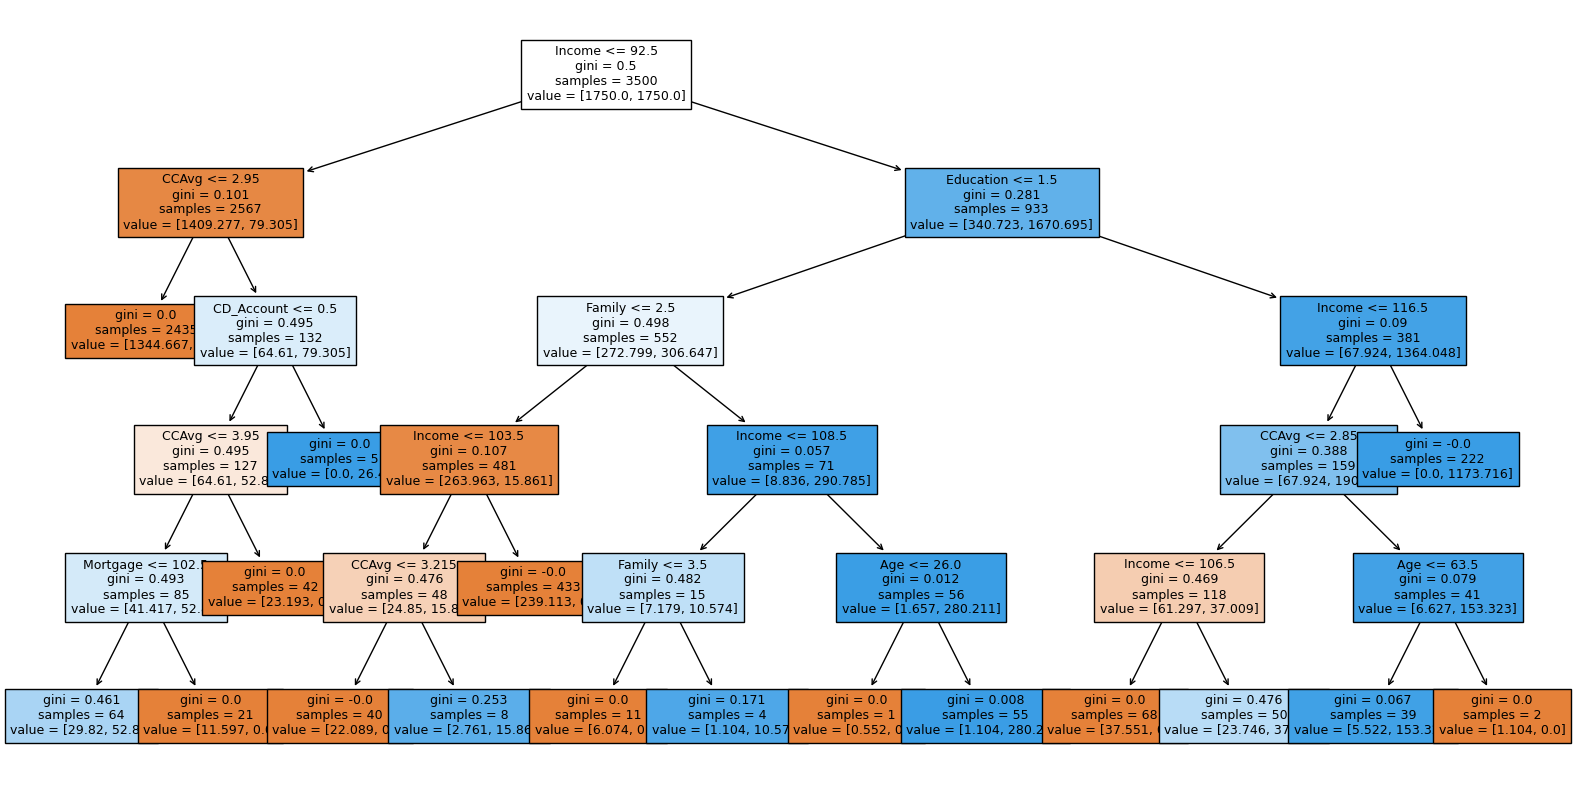

In [89]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    model3,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [90]:
# Text report showing the rules of a decision tree -
print(tree.export_text(model3, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Mortgage <= 102.50
|   |   |   |   |   |--- weights: [29.82, 52.87] class: 1
|   |   |   |   |--- Mortgage >  102.50
|   |   |   |   |   |--- weights: [11.60, 0.00] class: 0
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [23.19, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.00, 26.44] class: 1
|--- Income >  92.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- Income <= 103.50
|   |   |   |   |--- CCAvg <= 3.21
|   |   |   |   |   |--- weights: [22.09, 0.00] class: 0
|   |   |   |   |--- CCAvg >  3.21
|   |   |   |   |   |--- weights: [2.76, 15.86] class: 1
|   |   |   |--- Income >  103.50
|   |   |   |   |--- weights: [239.11, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- Income <= 108.50
|   |   |   |   |--

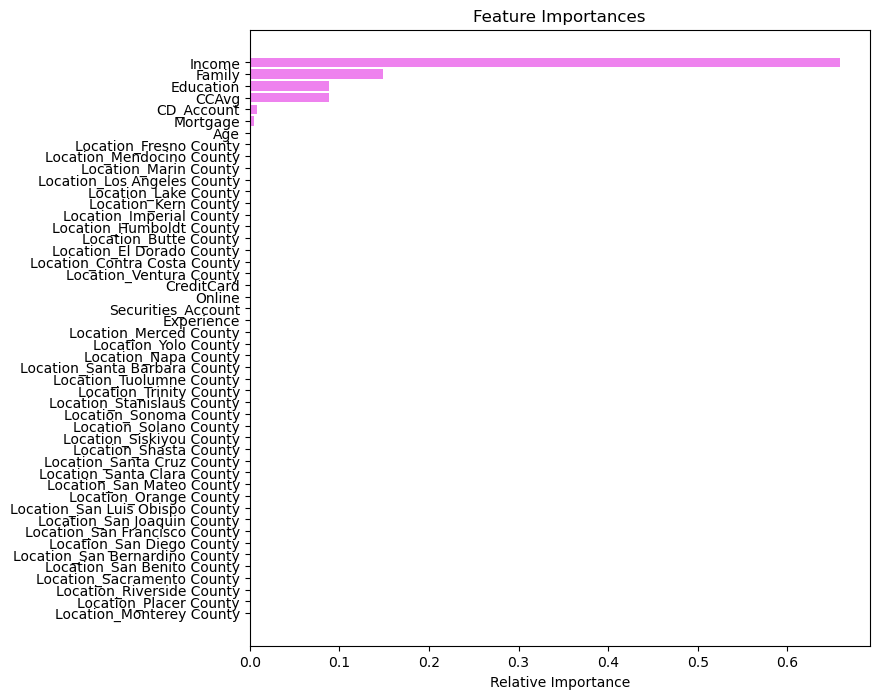

In [91]:
# importance of features in the tree building

importances = model3.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations:
1. Model performs well on both train and test set.
2. Small performance drop noticed in test compared to train.
3. Recall score is high, which is as expected by business.
4. Percision is moderate.
5. Small drop in F1 and Precision score.

### Decision Tree with Pre-Pruning via Hyperparameter Tuning (GridSearchCV)

#### GridSearchCV is an automated tuning method that tests many different tree configurations and selects the one that gives the best performance in predicting 

In [92]:
# Define the model and set parameters
model = DecisionTreeClassifier(random_state=1)

parameters = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "class_weight": [None, "balanced"],
}

# Define recall scorer 
recall_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(model, parameters, scoring=recall_scorer, cv=5)
grid_obj.fit(X_train, y_train)

# Get the best estimator and score
best_model = grid_obj.best_estimator_
best_params = grid_obj.best_params_
best_score = grid_obj.best_score_

# Print the best parameters
print("Best parameters found:")
print(f"criterion: {best_model.criterion}")
print(f"splitter: {best_model.splitter}")
print(f"max_depth: {best_model.max_depth}")
print(f"min_samples_split: {best_model.min_samples_split}")
print(f"min_samples_leaf: {best_model.min_samples_leaf}")
print(f"class_weight: {best_model.class_weight}")
print(f"Best test recall score: {best_score:.4f}")

Best parameters found:
criterion: gini
splitter: best
max_depth: 3
min_samples_split: 2
min_samples_leaf: 1
class_weight: balanced
Best test recall score: 0.9758


In [93]:
#7. Set the clf to the best combination of parameters
model4 = best_model

# Fit the best algorithm to the data.
model4.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=1)

In [94]:
# 8. Evaluate performance on training data
decision_tree_gridSearchCV_perf_train = model_performance_classification_sklearn(
    model4, X_train, y_train
)
decision_tree_gridSearchCV_perf_train

Accuracy    Recall  Precision        F1
0  0.956571  0.960725   0.695842  0.807107

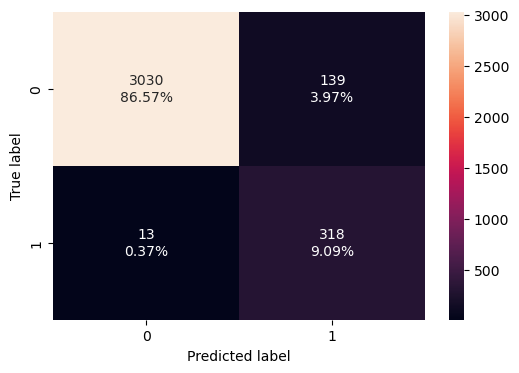

In [95]:
confusion_matrix_sklearn(model4, X_train, y_train)

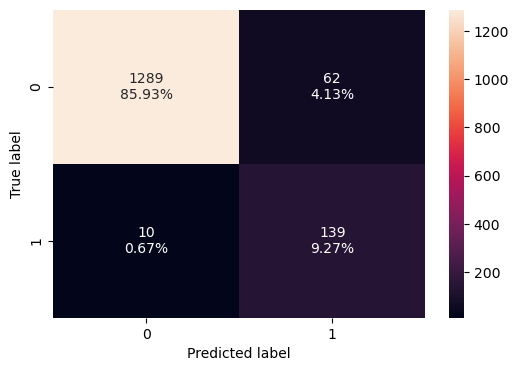

In [96]:
confusion_matrix_sklearn(model4, X_test, y_test)

In [97]:
#Check performace on test set
decision_tree_gridSearchCV_perf_test = model_performance_classification_sklearn(
    model4, X_test, y_test
)
decision_tree_gridSearchCV_perf_test

Accuracy    Recall  Precision        F1
0     0.952  0.932886   0.691542  0.794286

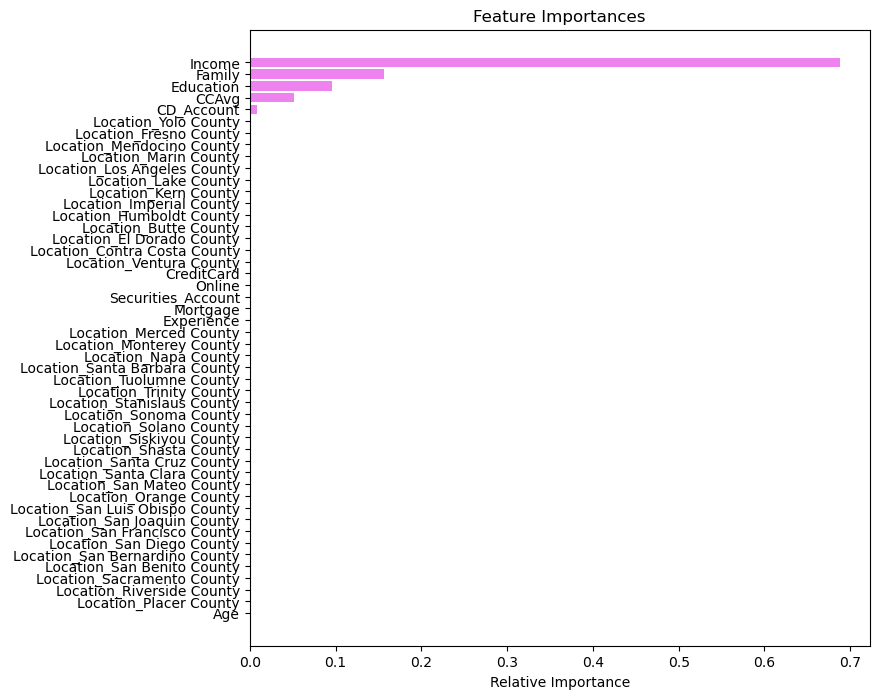

In [98]:
# importance of features in the tree building

importances = model4.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

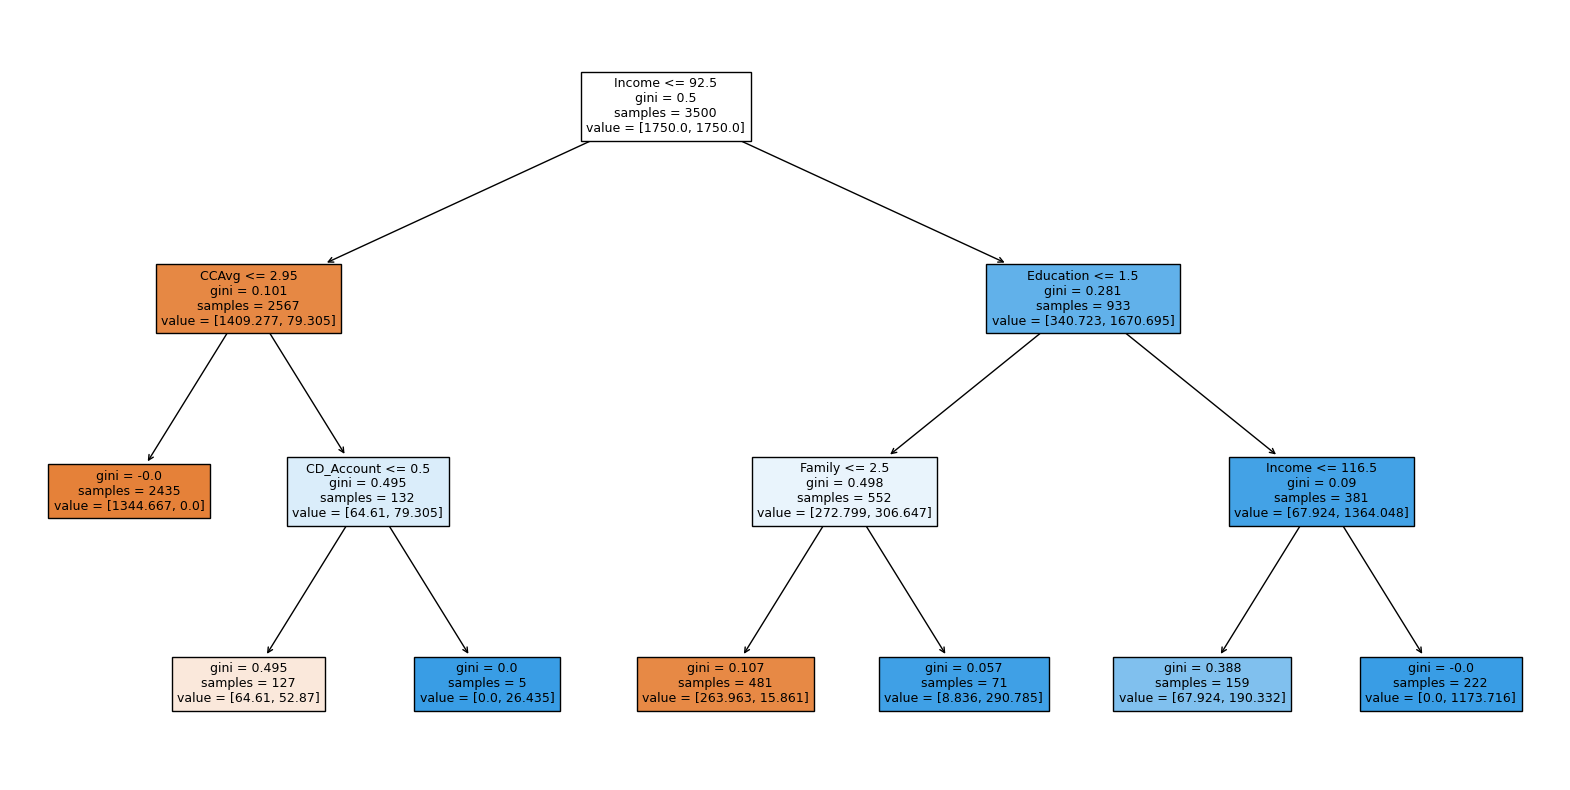

In [99]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    model4,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [100]:
# Text report showing the rules of a decision tree -
print(tree.export_text(model4, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- weights: [64.61, 52.87] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.00, 26.44] class: 1
|--- Income >  92.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [263.96, 15.86] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [8.84, 290.79] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 116.50
|   |   |   |--- weights: [67.92, 190.33] class: 1
|   |   |--- Income >  116.50
|   |   |   |--- weights: [0.00, 1173.72] class: 1



#### Observations:
1. High accuracy and recall. 
2. Precision is around 69%, indicating a noticeable amount of false positives.
3. Income, Education, and Family are key decision features

### Decision Tree (Post pruning)
* Cost complexity Pruning
* Greater values of ``ccp_alpha`` increase the number of nodes pruned.

In [101]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [102]:
pd.DataFrame(path)

ccp_alphas    impurities
0   0.000000e+00 -9.432788e-15
1   3.853725e-19 -9.432403e-15
2   4.729571e-19 -9.431930e-15
3   4.729571e-19 -9.431457e-15
4   5.255079e-19 -9.430931e-15
5   7.357111e-19 -9.430196e-15
6   3.573454e-18 -9.426622e-15
7   1.257806e-17 -9.414044e-15
8   1.545500e-04  3.090999e-04
9   1.582841e-04  6.256680e-04
10  2.032934e-04  1.235548e-03
11  2.095454e-04  1.864184e-03
12  2.857143e-04  2.435613e-03
13  3.049400e-04  2.740553e-03
14  3.075267e-04  3.048080e-03
15  3.082988e-04  3.664677e-03
16  3.124707e-04  3.977148e-03
17  3.156492e-04  5.871043e-03
18  3.607202e-04  7.674644e-03
19  3.656397e-04  9.137203e-03
20  4.779469e-04  9.615150e-03
21  5.839354e-04  1.019909e-02
22  6.726759e-04  1.087176e-02
23  6.947052e-04  1.295588e-02
24  8.230545e-04  1.377893e-02
25  9.269294e-04  1.470586e-02
26  1.038905e-03  1.574477e-02
27  1.250067e-03  1.824490e-02
28  1.288010e-03  1.953291e-02
29  1.671123e-03  2.120403e-02
30  1.693744e-03  2.459152e-02
31  2.221376e-03  2.903427e-02
32  2.375809e-03  3.141008e-02
33  3.344493e-03  3.475457e-02
34  3.602932e-03  4.196044e-02
35  3.729690e-03  4.569013e-02
36  4.920880e-03  5.061101e-02
37  1.007808e-02  7.076717e-02
38  2.255792e-02  9.332509e-02
39  5.564782e-02  2.046207e-01
40  2.953793e-01  5.000000e-01

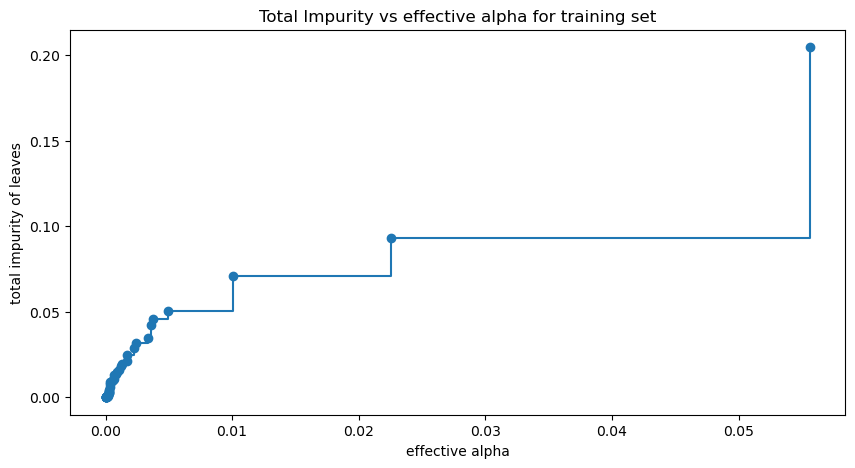

In [103]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [104]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2953792759992334


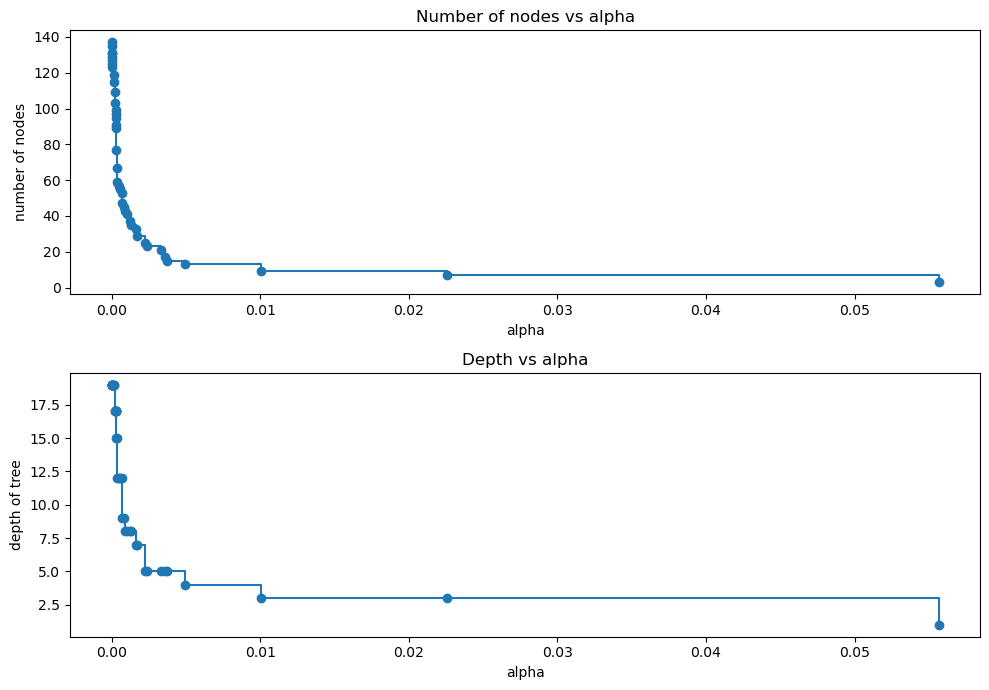

In [105]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [106]:
#Recall score on Train set 
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [107]:
#Recall score on test set 
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [108]:
#Obtaing scores
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

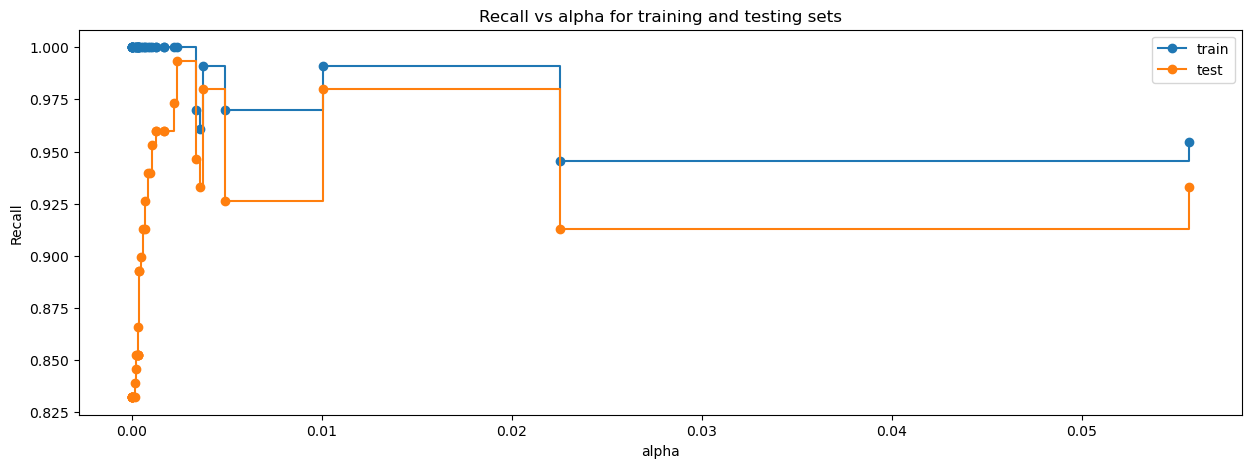

In [109]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [110]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.002375808619774652, class_weight='balanced',
                       random_state=1)


In [111]:
model5 = best_model
model5.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.002375808619774652, class_weight='balanced',
                       random_state=1)

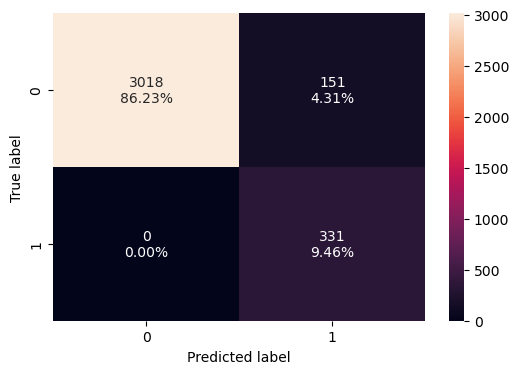

In [112]:
confusion_matrix_sklearn(model5, X_train, y_train)

In [113]:
#Check performace on train set
decision_tree_post_perf_train = model_performance_classification_sklearn(
    model5, X_train, y_train
)
decision_tree_post_perf_train

Accuracy  Recall  Precision        F1
0  0.956857     1.0   0.686722  0.814268

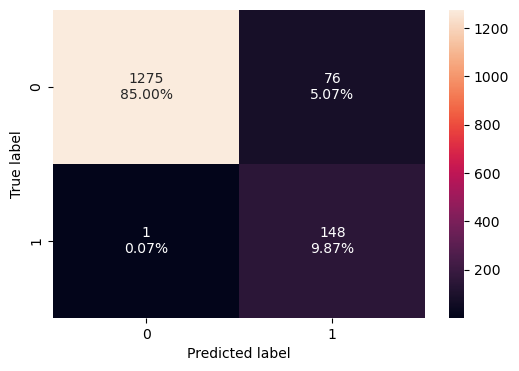

In [114]:
confusion_matrix_sklearn(model5, X_test, y_test)

In [115]:
#Check performace on test set
decision_tree_post_perf_test = model_performance_classification_sklearn(
    model5, X_test, y_test
)
decision_tree_post_perf_test

Accuracy    Recall  Precision        F1
0  0.948667  0.993289   0.660714  0.793566

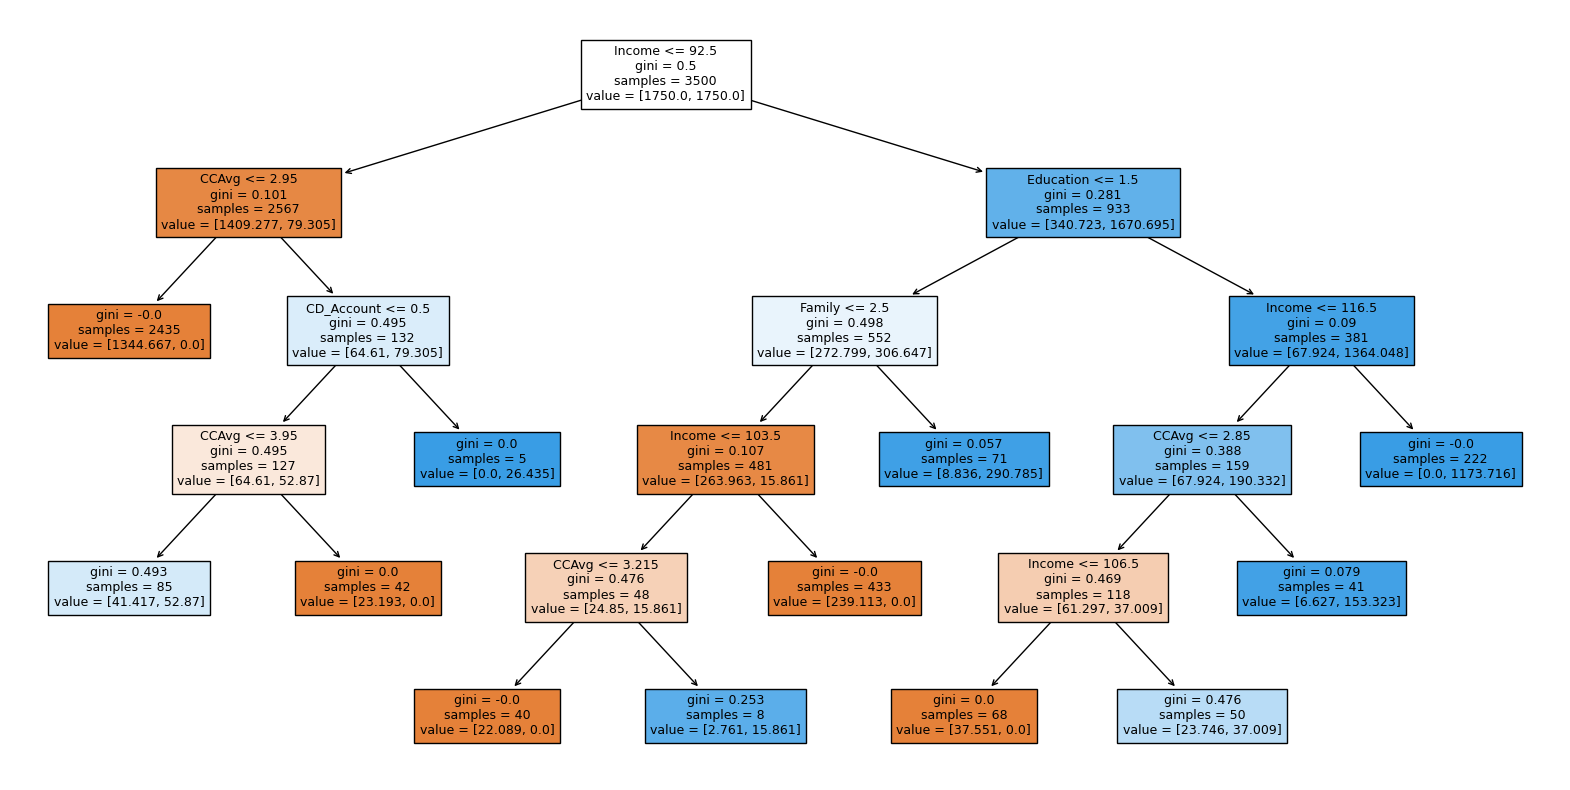

In [116]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    model5,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [117]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model5, feature_names=feature_names, show_weights=True))


|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- weights: [41.42, 52.87] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [23.19, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.00, 26.44] class: 1
|--- Income >  92.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- Income <= 103.50
|   |   |   |   |--- CCAvg <= 3.21
|   |   |   |   |   |--- weights: [22.09, 0.00] class: 0
|   |   |   |   |--- CCAvg >  3.21
|   |   |   |   |   |--- weights: [2.76, 15.86] class: 1
|   |   |   |--- Income >  103.50
|   |   |   |   |--- weights: [239.11, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [8.84, 290.79] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 116.50
|   |   |   |--- CCAvg <= 2.85
|   |   |   |   |--- Income <= 106.50
|   |   |   |   | 

In [118]:
importances = model5.feature_importances_
indices = np.argsort(importances)

In [119]:
importances

array([0.        , 0.        , 0.66515466, 0.14734791, 0.08937416,
       0.09016388, 0.        , 0.        , 0.00795939, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

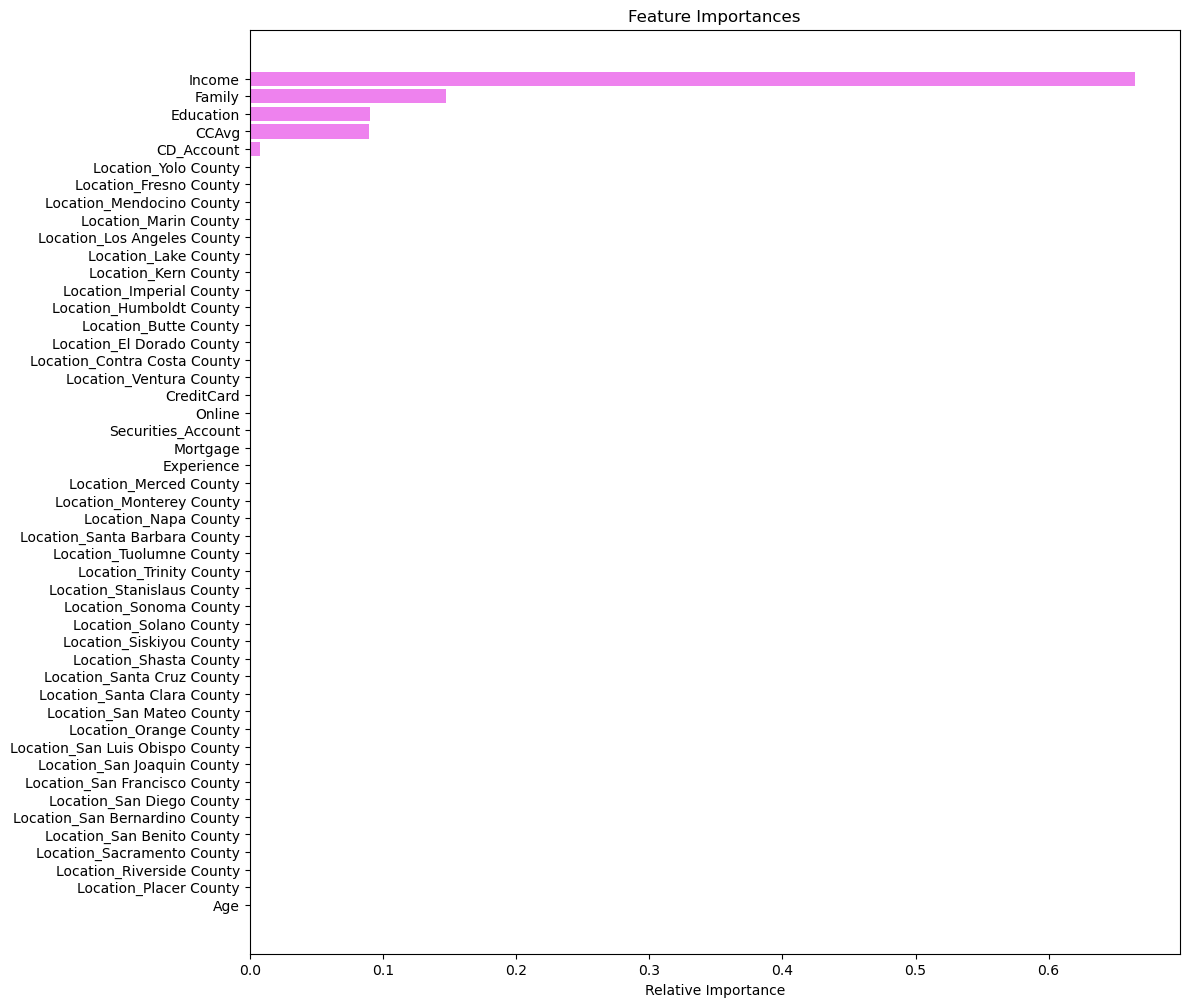

In [120]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations:
1. The model is not overfitting — train and test scores are close.
2. It’s highly sensitive (high recall), making it suitable for cases where missing a positive is risky.
3. Precision is moderate, so you may get some false alarms.
4. Decision tree is well-pruned and interpretable.
5. Top features influencing decisions: Income, Family, Education, CCAvg.

## Comparison of Models and Final Model Selection

In [121]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_default_perf_train.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_gridSearchCV_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree-Manually Tuned (Pre-Pruning)",
    "Decision Tree-gridSearchCV (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree (sklearn default)  Decision Tree with class_weight  \
Accuracy                               1.0                              1.0   
Recall                                 1.0                              1.0   
Precision                              1.0                              1.0   
F1                                     1.0                              1.0   

           Decision Tree-Manually Tuned (Pre-Pruning)  \
Accuracy                                     0.966857   
Recall                                       1.000000   
Precision                                    0.740492   
F1                                           0.850900   

           Decision Tree-gridSearchCV (Pre-Pruning)  \
Accuracy                                   0.956571   
Recall                                     0.960725   
Precision                                  0.695842   
F1                                         0.807107   

           Decision Tree (Post-Pruning)  
Accuracy                       0.956857  
Recall                         1.000000  
Precision                      0.686722  
F1                             0.814268

In [122]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_default_perf_test.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_gridSearchCV_perf_test.T,
        decision_tree_post_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree-Manually Tuned(Pre-Pruning)",
    "Decision Tree-gridSearchCV(Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Decision Tree (sklearn default)  Decision Tree with class_weight  \
Accuracy                          0.978667                         0.972000   
Recall                            0.879195                         0.832215   
Precision                         0.903448                         0.879433   
F1                                0.891156                         0.855172   

           Decision Tree-Manually Tuned(Pre-Pruning)  \
Accuracy                                    0.954667   
Recall                                      0.959732   
Precision                                   0.697561   
F1                                          0.807910   

           Decision Tree-gridSearchCV(Pre-Pruning)  \
Accuracy                                  0.952000   
Recall                                    0.932886   
Precision                                 0.691542   
F1                                        0.794286   

           Decision Tree (Post-Pruning)  
Accuracy                       0.948667  
Recall                         0.993289  
Precision                      0.660714  
F1                             0.793566

### Conclusion:
To provide accurate predictions of customers who will accept personal loans, we recommend the -
#### Post-pruned Decision Tree model

Reason:
1. Recall score (0.993)   --> very High. Aligns with Business goal to predict potential customers who will borrow a personal loan
2. Precision score (0.66) --> Acceptable range, wont be facing too many false positives
3. F1 score (0.79)        --> A good balance of precision and recall
4. Accuracy score(0.94)   --> High Accuracy score. 

Best overall model with almost perfect Recall score, with decent precision and accuracy scores. This is very close to the ideal model based on Model Evaluation Criterion. This model best aligns with our business objective of minimising revenue loss due to false negatives.

### Kay Takeaways :

#### Key Drivers behind Loan acceptance:
1. Income    -->  Strong predictor. Higher income customers( > 100K) are more likely to accept personal loan
2. Family    -->  Customers with larger families (Family size > 2) tend to accecpt more loans. This could be due to higher financial necessities
3. Education -->  Better educated individuals are more likely to accept personal loans.
4. Card Spending(CCAvg) --> Higher credit card spending(CCAvg) customers have higher chance to accept loans.

#### What NOT to focus:
1. Geography doesn’t influence loan acceptance.26. Features like Online, CreditCard, Securities_Account, Mortgage, Experience, and Age also have no measurable influence in this model



### Recommendations :
1. Focus efforts on high income, well educated customers with large families with higher credit card usuage.
2. Accept few fasle positives(Model predicts YES, but the customer actually won’t accept loan) , because the model ensures almost no pontential customers are missed as Opportunity loss will be greater and will lead to revenue loss and possibly the customer.
3. Train Marketing, Sales and business teams on the above Key takeaways and Key driving factors

### Campaign Strategy :
1. Focus on Target customers in below order:
   - High Income customers - Annual income > $100K
   - Higher family size - Family size > 2
   - Higher Educated customers - Graduates and above
   - High spenders on Creditcard - > $3K per month
2. Marketing Strategy for targeted customers
   - Personalized messaging
   - Email notification
   - SMS/WhatsApp messages
   - Ads
   - Marketing team followUps